In [1]:
import pandas as pd
import numpy as np
import os

# ML
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV,learning_curve, KFold
from sklearn.metrics import confusion_matrix, roc_curve,roc_auc_score
from sklearn.utils.multiclass import unique_labels
from sklearn.decomposition import PCA

# Deep Learning Libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from keras import initializers
import tensorflow as tf


#OS stuff
import os
import glob
from time import time
from itertools import product

#plotting Libs
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\JOSH\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Load some of our functions which will be used later - Feel Free to Skip

In [2]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, scoring=None, obj_line=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), figsize = (10,6)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    scoring : string, callable or None, optional, default: None
              A string (see model evaluation documentation)
              or a scorer callable object / function with signature scorer(estimator, X, y)
              For Python 3.5 the documentation is here:
              http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
              For example, Log Loss is specified as 'neg_log_loss'
              
    obj_line : numeric or None (default: None)
               draw a horizontal line 
               

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
        
    Citation
    --------
        http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
        
    Usage
    -----
        plot_learning_curve(estimator = best_estimator, 
                            title     = best_estimator_title, 
                            X         = X_train, 
                            y         = y_train, 
                            ylim      = (-1.1, 0.1), # neg_log_loss is negative
                            cv        = StatifiedCV, # CV generator
                            scoring   = scoring,     # eg., 'neg_log_loss'
                            obj_line  = obj_line,    # horizontal line
                            n_jobs    = n_jobs)      # how many CPUs

         plt.show()
    """
    from sklearn.model_selection import learning_curve
    import numpy as np
    from matplotlib import pyplot as plt
    
    plt.figure(figsize = figsize)
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    if obj_line:
        plt.axhline(y=obj_line, color='blue')

    plt.legend(loc="best")
    return plt

def plot_learning_curves_nimb(param, train_scores,test_scores,ylim=None, xlabel='paramater range',  obj_line=None,title='learning curve', figsize = (10,6)):
    """Plot training and test scores in relation to a parameter setting"""

    plt.figure(figsize = figsize)
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel(xlabel)
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(param, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(param, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(param, train_scores_mean, 'o-', color="r",
             label="Training score via CV")
    plt.plot(param, test_scores_mean, 'o-', color="g",
             label="Testing Score via CV")

    if obj_line:
        plt.axhline(y=obj_line, color='blue')

    plt.legend(loc="best")
    return plt

In [3]:
def layers_exp(n_layers, starting_nodes, train_X, train_y, test_X, test_y, activation, epochs =100, batch_size = 400, early_stopping = None, verbose = 0, class_pred = False):
    """ Layers Experiment Function
    
    :Parameters
    :n_layers - number of layers
    :starting_nodes - number of nodes in the starting layer
    :train_x - training examples X matrix
    :train_y - training examples y matrix
    :test_x - testing examples X matrix
    :test_y - testing examples of y matrix
    :activation - activation function
    :epochs - number of epochs to use
    :batch_size - batch sizes to use
    :early_stopping - number of successive rounds in which loss doesn't improve then stop
    :verbose - how much information do you want to see printed in the console
    
    :returns
    history - a keras history object
    
    :example
    history = layers_exp(i,starting_node,telco_X_train, y_train, telco_X_test, y_test, activation = activ, epochs = 150, batch_size = 400,verbose=0)
    
    """
    # configure the model based on the data
    n_row, n_cols = train_X.shape
    try:
        targ_row, targ_classes = test_y.shape
    except ValueError:
        targ_row = test_y.shape[0]
        targ_classes = 1
    # earling stopping and other specifications
    early_stopping_monitor = EarlyStopping(monitor='val_acc', mode='max', patience=early_stopping)
    callbacks = [early_stopping_monitor]
    
    # define the model
    model = Sequential()
    model.add(Dense(starting_nodes, input_shape=(n_cols,),activation=activation, kernel_initializer=initializers.random_normal(mean = 0.0, stddev=0.02)))
    for _ in range(1, n_layers):
        # Professor has stated he typically reduces each layer by 1/2 the previous layer. 
        # Considering the professors years of experience we will go with this logic
        starting_nodes = np.ceil(starting_nodes/2).astype('int32')
        model.add(Dense(starting_nodes, activation=activation, kernel_initializer=initializers.random_normal(mean = 0.0, stddev=0.02)))
    
    # Final output layer
    model.add(Dense(targ_classes, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
    # fit model
    if early_stopping is not None:
        history = model.fit(train_X, train_y, validation_data=(test_X, test_y),epochs=epochs, batch_size = batch_size, verbose=verbose, callbacks=callbacks)
    history = model.fit(train_X, train_y, validation_data=(test_X, test_y),epochs=epochs, batch_size = batch_size, verbose=verbose) 
    
    if class_pred:
        pred = model.predict_classes(test_X)
        pred_prob = model.predict_proba(test_X)
        return history, pred, pred_prob
    else:
        # evaluate model on test set
        #_, test_acc = model.evaluate(testX, testy, verbose=0)
        return history
    
    
def evaluate_nn(n_layers, starting_nodes, train_X, train_y, test_X, test_y, activation, epochs =100, batch_size = 400, early_stopping = None, verbose = 0, class_pred = False):
    """ Layers Experiment Function
    
    :Parameters
    :n_layers - number of layers
    :starting_nodes - number of nodes in the starting layer
    :train_x - training examples X matrix
    :train_y - training examples y matrix
    :test_x - testing examples X matrix
    :test_y - testing examples of y matrix
    :activation - activation function
    :epochs - number of epochs to use
    :batch_size - batch sizes to use
    :early_stopping - number of successive rounds in which loss doesn't improve then stop
    :verbose - how much information do you want to see printed in the console
    
    :returns
    train_acc, test_acc - a keras training and validation accuracy
    
    :example
    history = layers_exp(i,starting_node,telco_X_train, y_train, telco_X_test, y_test, activation = activ, epochs = 150, batch_size = 400,verbose=0)
    
    """
    # configure the model based on the data
    n_row, n_cols = train_X.shape
    try:
        targ_row, targ_classes = test_y.shape
    except ValueError:
        targ_row = test_y.shape[0]
        targ_classes = 1
    # earling stopping and other specifications
    early_stopping_monitor = EarlyStopping(monitor='val_acc', mode='max', patience=early_stopping)
    callbacks = [early_stopping_monitor]
    
    # define the model
    model = Sequential()
    model.add(Dense(starting_nodes, input_shape=(n_cols,),activation=activation, kernel_initializer=initializers.random_normal(mean = 0.0, stddev=0.02)))
    for _ in range(1, n_layers):
        # Professor has stated he typically reduces each layer by 1/2 the previous layer. 
        # Considering the professors years of experience we will go with this logic
        starting_nodes = np.ceil(starting_nodes/2).astype('int32')
        model.add(Dense(starting_nodes, activation=activation, kernel_initializer=initializers.random_normal(mean = 0.0, stddev=0.02)))
    
    # Final output layer
    model.add(Dense(targ_classes, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
    # fit model
    if early_stopping is not None:
        history = model.fit(train_X, train_y, validation_data=(test_X, test_y),epochs=epochs, batch_size = batch_size, verbose=verbose, callbacks=callbacks)
    
    history = model.fit(train_X, train_y, validation_data=(test_X, test_y),epochs=epochs, batch_size = batch_size, verbose=verbose)
    # evaluate the model
    _, train_acc = model.evaluate(train_X, train_y, verbose=verbose)
    _, test_acc = model.evaluate(test_X, test_y, verbose=verbose)
    
    if class_pred:
        pred = model.predict_classes(test_X)
        pred_prob = model.predict_proba(test_X)
        return train_acc, test_acc, pred, pred_prob
    else:
        return train_acc,test_acc

In [4]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    This function was borrowed from scikit-learn website.
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [336]:
def learn_curve_nn(n_layers, starting_nodes, epochs,X,y,activation = 'relu',early_stopping=5, batch=1000, verbose = 0, class_pred=False, cv=5, train_sizes = np.array([.2,.4,.8,1])):
    """
    This is a learning curve for a neural net to see if you have low bias/variance
    
    :Parameters
    
    :n_layers - number of layers
    :starting_nodes - number of starting nodes
    :epochs - number of epochs
    :X - Features
    :y - target labels
    :activation - what activation function are you running
    :early_stopping - self explantoray
    :batch - batch sizes
    :verbose - how much do you want printed to the terminal
    :class_pred - should class predictions AND their labels be returned
    :cv - cross validations
    :train_sizes - percentage of total data to use
    
    :Returns
    
    :train_scores - n fold CV training scores
    :test_scores - n fold CV testing scores
    :size - size of the training examples passed to fit. Test size will be based on how many k-folds you will use
    
    """
    orig_size = len(X)
    index = np.argwhere(X[:,0] >= X[:,0].min()).ravel()
    play_with = orig_size
    choice = np.array([])
    size = []
    train_scores = []
    test_scores = []
    for i in train_sizes:
        total = np.ceil(i*orig_size).astype(int)
        num_to_add = total - len(choice)
        add_index = np.random.choice(index, size = num_to_add, replace=False)
        choice = np.insert(choice.astype(int),0,add_index.astype(int))
        index = np.delete(index,add_index,axis=0)
        size.append(len(choice))
        
        # now run model with choice
        kfold = KFold(n_splits=cv,shuffle=True,)
        inner_train_score = []
        inner_test_score = []
        new_X = X[choice]
        new_y = y[choice]
        for train, test in kfold.split(X[choice], y[choice]):

            # since we scaled before we need to do it again to stay consistent
            # fb_mod_comp_scale = StandardScaler().fit(X_fb_top[train])
            # fb_topn_train_sc_mc = fb_mod_comp_scale.transform(X_fb_top[train])
            # fb_topn_test_sc_mc = fb_mod_comp_scale.transform(X_fb_top[test])

            if class_pred:
                train_acc, test_acc, pred, pred_prob = evaluate_nn(n_layers,starting_nodes,X[train], y[train],X[test] ,y[test], 
                                                                  activation = activation, epochs = epochs,batch_size = batch,early_stopping=early_stopping,verbose=verbose,class_pred=class_pred)
            else:
                # evaluate the models
                train_acc, test_acc = evaluate_nn(n_layers,starting_nodes,X[train], y[train],X[test] ,y[test], 
                                                   activation = activation, epochs = epochs,batch_size = batch,early_stopping=early_stopping,verbose=verbose,class_pred=class_pred)
            inner_train_score.append(train_acc)
            inner_test_score.append(test_acc)
        train_scores.append(np.array(inner_train_score))
        test_scores.append(np.array(inner_test_score))
        
    return train_scores, test_scores, size

# Load Facebook data 

#### Note we are only using Variant 1

In [5]:
colnames = ['page_pop',
           'page_check','page_talk_bt','page_cat','tot_min','tot_max','tot_avg','tot_med','tot_std','l24_min',
            'l24_max','l24_avg','l24_med','l24_std','l24_48_min','l24_48_max','l24_48_avg','l24_48_med','l24_48_std',
            'l48_72_min','l48_72_max','l48_72_avg','l48_72_med','l48_72_std','diff_24_48_min','diff_24_48_max','diff_24_48_avg',
            'diff_24_48_med','diff_24_48_std','num_comm_pre','num_comm_l24','num_comm_pre_24_48','num_comm_fir_24','num_comm_diff_24_48',
            'base_time','pst_len','pst_shre_cnt','pst_prom_stat','h_hours','pub_sun','pub_mon','pub_tue','pub_wed','pub_thu','pub_fri',
            'pub_sat','base_sun','base_mon','base_tue','base_wed','base_thu','base_fri','base_sat','comm_h_hours'
            ]

In [6]:
train_df = pd.read_csv('..\data\Dataset\Training\Features_Variant_1.csv', header=None)
test_df = pd.concat([pd.read_csv(f,header=None,nrows=1000)for f in glob.glob('..\data\Dataset\Testing\TestSet\Test_Case_*.csv')], ignore_index=True)

final_df = pd.concat([train_df,test_df])
final_df.head()

new_cols = dict(zip(train_df.columns,colnames))
final_df.rename(new_cols, axis='columns',inplace=True)

# Teleco Customer Churn Dataset

### Why is this dataset interesting, why is the classification interesting

we find this interesting because customer churn is a fascinating topic. What is it about a customer that causes them to churn? The ability to answer this questions and how to answer it is readily applicable in today's job market.

If we can find a way to prevent customer churn and show it to our managers, it will not only make us look good but keep us employed.

If we can find the attributes that help signal who is about to churn then we can provide the customer different offers to retain them.

Data is broken down on an individual customer basis and the types of service they have as well as how long they've been a customer

In [7]:
telco_df = pd.read_csv('..\data\WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco_df.columns = [x.lower() for x in telco_df.columns]
telco_df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Feature Engineering on the dataset

Change our target varialbe from a yes/no to a 1/0. This ensures our algorithms can model them

Also, cleaning up other features a bit (yes/no --> 1/0) data a little bit to make it easier to get dummy varialbes and model.


In [8]:
#binary target conversion from yes/no to 1,0
telco_df['churn_bin'] = np.where(telco_df['churn'] == 'Yes',1,0)

#Feature engineering
telco_df.gender.replace(['Male', 'Female'], [1, 0], inplace=True)
telco_df.partner.replace(['Yes', 'No'], [1, 0], inplace=True)
telco_df.dependents.replace(['Yes', 'No'], [1, 0], inplace=True)
telco_df.phoneservice.replace(['Yes', 'No'], [1, 0], inplace=True)
telco_df.paperlessbilling.replace(['Yes', 'No'], [1, 0], inplace=True)
telco_df.paymentmethod.replace(to_replace=dict(zip(['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'],['echeck','mcheck','banktrans','cc'])), inplace=True)
telco_df.contract.replace(to_replace=dict(zip(['Month-to-month','One year','Two year'],['mtm','one_yr','two_yr'])), inplace=True)
telco_df.onlinesecurity.replace(to_replace=dict(zip(['No','Yes','No internet service'],['no','yes','nis'])) , inplace=True)
telco_df.onlinebackup.replace(to_replace=dict(zip(['No','Yes','No internet service'],['no','yes','nis'])) , inplace=True)
telco_df.deviceprotection.replace(to_replace=dict(zip(['No','Yes','No internet service'],['no','yes','nis'])) , inplace=True)
telco_df.techsupport.replace(to_replace=dict(zip(['No','Yes','No internet service'],['no','yes','nis'])) , inplace=True)
telco_df.streamingtv.replace(to_replace=dict(zip(['No','Yes','No internet service'],['no','yes','nis'])) , inplace=True)
telco_df.streamingmovies.replace(to_replace=dict(zip(['No','Yes','No internet service'],['no','yes','nis'])) , inplace=True)
telco_df.multiplelines.replace(to_replace=dict(zip(['no','yes','No phone service'],['no','yes','nps'])) , inplace=True)
telco_df.internetservice.replace(to_replace=dict(zip(['DSL' ,'Fiber optic', 'No'],['dsl','fiber','no'])) , inplace=True)
telco_df['totalcharges'] = pd.to_numeric(telco_df.totalcharges.str.strip(" "))

### Feature Engineering part2

1. Get dummies for our variables we replaced above. Again this is done so it's easier to train the model
2. We found a few null value with respect to total charges. Given that these null values have a tenure of 0 we are converting their monthly charges to total charges.


In [9]:
#one hot encoding
telco_df2 = pd.get_dummies(telco_df, columns = ['multiplelines','internetservice','onlinesecurity','onlinebackup', 'deviceprotection','techsupport','streamingtv','streamingmovies','contract','paymentmethod'],
                           drop_first=True)
telco_df2.isnull().any()
check_these = telco_df2[telco_df2.totalcharges.isnull()].index

In [10]:
telco_df2.totalcharges = np.where(telco_df2.totalcharges.isnull(), telco_df2.monthlycharges,telco_df2.totalcharges)
print(f'Our data has {telco_df2.shape[0]} rows and {telco_df2.shape[1]} columns')

Our data has 7043 rows and 33 columns


In [11]:
exclude_cols = ['churn','churn_bin','customerid']
X = telco_df2[telco_df2.columns[~telco_df2.columns.isin(exclude_cols)]].values
y = telco_df2['churn_bin'].values

# Telco Exploratory Analysis

 - 21 of our 31 variables % of our features are positvely correlated with our target variable. The other remaining are dummy variables
 - our least correlated variable is -23% which would be considered weakly classified
 - We will leave all the variables in as these attributes of the individual will be important to classify whether they churned or not
 - Our class balance is 73%/27%

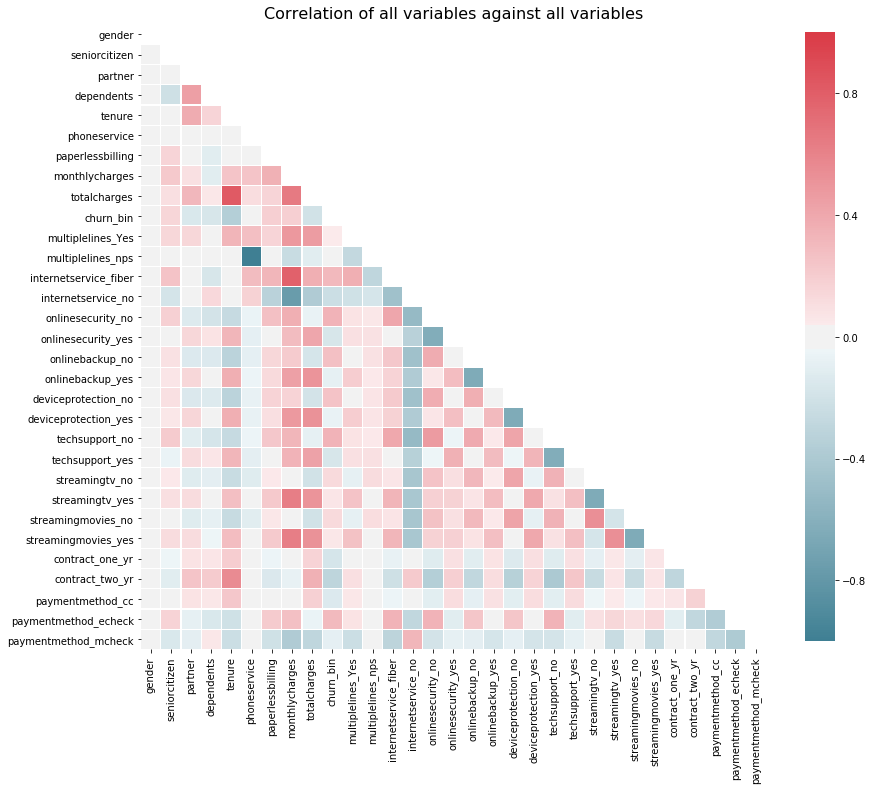

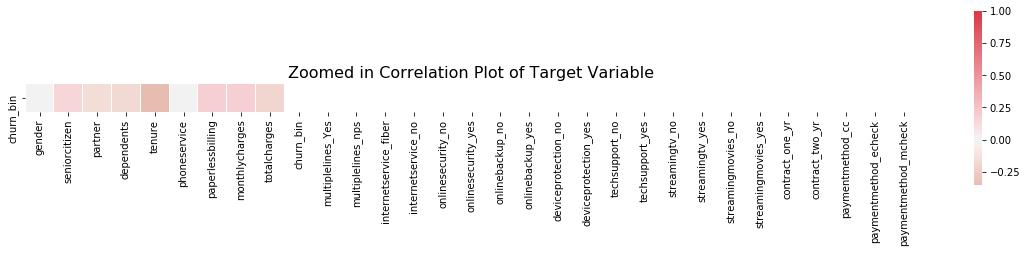

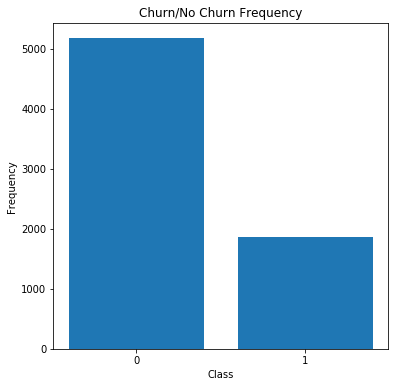

In [12]:
#telco_df2.loc[:,['page_pop', 'page_talk_bt', 'tot_avg', 'l24_avg', 'l24_48_avg', 'l48_72_avg', 'pst_len', 'pst_shre_cnt', 'comm_h_hours']].corr(method='pearson')
telcorr = telco_df2.corr(method='pearson')
mask = np.zeros_like(telcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
ax.set_title('Correlation of all variables against all variables', fontsize = 16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(telcorr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.1, cbar_kws={"shrink": .8})


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 10, as_cmap=True)

ax.set_title("Zoomed in Correlation Plot of Target Variable", fontsize = 16)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(telcorr[9:10], mask=mask[9:10], cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.15, cbar_kws={"shrink": .8})

unique, counts = np.unique(telco_df2.churn_bin, return_counts=True)
plt.figure(figsize = (6,6))
plt.bar(unique,counts)
plt.title('Churn/No Churn Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0,1], unique)
plt.show()

# Telco MinMax Scaling & PCA

 - Here we are choosing to 0/1 scaling our features
 - last time we choose to normalize, this time we want to min max scale to see how it interacts with the algorithms
 - This will be important for KNN
 - PCA performed as some values are linear combination of the others i.e totalcharges are a function of tenure and monthly charges


In [13]:
# initial train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .20, shuffle = True)

# scale
min_max_scale = MinMaxScaler()
telco_minmax = min_max_scale.fit(x_train)
telco_X_train = telco_minmax.transform(x_train)
telco_X_test = telco_minmax.transform(x_test)

#we want 90% of the variation
pca = PCA(n_components=.90,random_state=20190301)
telco_X_train = pca.fit_transform(telco_X_train)
telco_X_test = pca.transform(telco_X_test)

 - We need to split our data again because if we use our testing set for validation we induce an optimistic bias into our testing evaluation

In [14]:
telco_x_train, telco_x_val, telco_y_train, telco_y_val = train_test_split(telco_X_train, y_train)

# Telco KNN Grid Search

- 7 fold cross validation
- trying between 1 and 110 neighbors
- We want to experiment with a large range and different weighting metrics

In [14]:
k_range = list(range(0,110))
k_range = np.where(np.arange(0,110,10) ==0,1,np.arange(0,110,5))
param_grid = {'n_neighbors': k_range,
              'weights':['uniform','distance'],
             'p': [1,2]}

In [115]:
############################################################################################
#
## Grid search feel free to run, it'll take you about 5-10 mins to run
#
############################################################################################
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn,param_grid=param_grid,n_jobs=-1,cv=7, verbose=2)
knn_grid.fit(telco_x_train,telco_y_train)

Fitting 7 folds for each of 88 candidates, totalling 616 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 616 out of 616 | elapsed:  1.4min finished


GridSearchCV(cv=7, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': array([  1,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105]), 'weights': ['uniform', 'distance'], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [116]:
# Grab the scores
knn_grid_mean_score = knn_grid.cv_results_['mean_test_score'].reshape(len(k_range),len(param_grid.keys())+1)
knn_grid_std_score = knn_grid.cv_results_['std_test_score'].reshape(len(k_range),len(param_grid.keys())+1)
knn_grid_mean_time = knn_grid.cv_results_['mean_fit_time'].reshape(len(k_range),len(param_grid.keys())+1)
knn_grid_std_time= knn_grid.cv_results_['std_fit_time'].reshape(len(k_range),len(param_grid.keys())+1)

In [141]:
# What is our best estimator and fit it
best_knn_telcom = knn_grid.best_estimator_
best_knn_telcom.p = 1
best_knn_telcom.n_neighbors = 95
best_knn_telcom.weights = 'uniform'
best_knn_telcom.n_jobs = -1
best_knn_telcom.fit(telco_x_train,telco_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=95, p=1,
           weights='uniform')

# Telco KNN Learning Curves
### Plot 1 - 64% of data or training/validation
1. We wanted to see if our training set on 64% of the data suffered from high bias/variance. We conclude that it doesn't suffer from them as the accuracy on the training and testing converges as training examples increase

### Plot 2 - 80% of data or training/test
1. We wanted to see, as we provide more and more training examples doe we suffer from high bias/variance. Conclusion, no we do not suffer from high bias/bvariance. We conclude our model doesn't suffer from high bias/variance

#### Why did we use train/validation/test?
1. We know that if we fit the model on the training set then evaluate on the testing set and repeat this process our we can introduce optimisitic bias into our model. In order to prevent this we split the data into train/validation/test. 

<module 'matplotlib.pyplot' from 'C:\\Users\\JOSH\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 432x288 with 0 Axes>

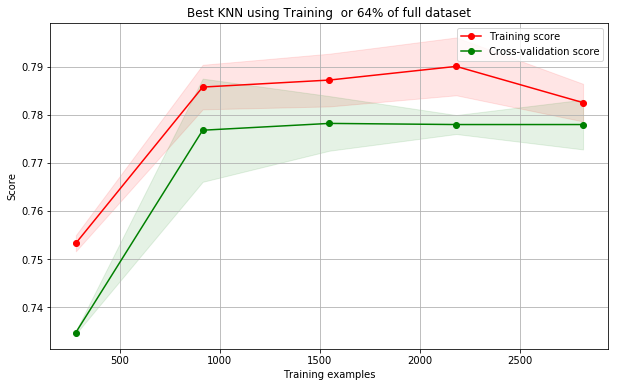

<Figure size 432x288 with 0 Axes>

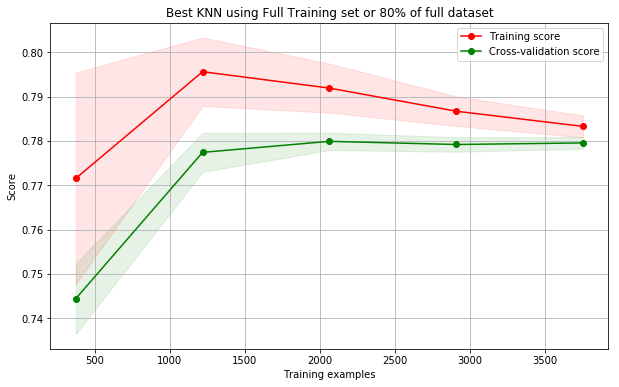

In [142]:
plt.figure()
plot_learning_curve(best_knn_telcom,'Best KNN using Training  or 64% of full dataset',telco_x_train,telco_y_train)
plt.figure()
plot_learning_curve(best_knn_telcom,'Best KNN using Full Training set or 80% of full dataset',telco_X_train,y_train)

# Telco Performance Experiments

### Learning Curve - Accuarcy of # of neigbors
1. As the number of neighbors increase our training accuracy increases across all neighbors increases until we get to roughly 95neighbors at which point it levels out
1. the p value of 1 performs the best with best uniform and distance metrics being equal
 - p value = 1 represents the manhattan distance or what's referred to as city block distance
 - the fact that distance performs worse than uniform tells us our class labels = 1 are pretty far apart from each other

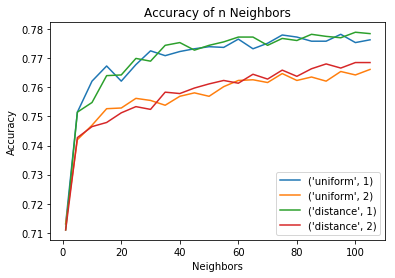

In [123]:
labels = list(product(param_grid['weights'], param_grid['p']))
for y_arr, label in zip(knn_grid_mean_score.T, labels):
    plt.plot(k_range,y_arr, label=label)
plt.ylabel('Accuracy')
plt.xlabel('Neighbors')
plt.title('Accuracy of n Neighbors')
plt.legend()

### Learning Curve - Time to Compute
1. This is a pretty quick algorithm so time isn't necessarily relevant here. 
 - Most of our values range between .015 seconds to .04 seconds to fit the model. Not matter the model we pick time won't be a relevant factor

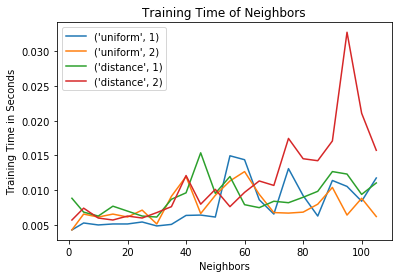

In [124]:
for y_arr, label in zip(knn_grid_mean_time.T, labels):
    plt.plot(k_range,y_arr, label=label)
plt.ylabel('Training Time in Seconds')
plt.xlabel('Neighbors')
plt.title('Training Time of Neighbors')
plt.legend()

In [143]:
results = pd.DataFrame(knn_grid.cv_results_)
results = results.sort_values(by='rank_test_score').reset_index(drop=True)

C:\Users\JOSH\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\JOSH\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\JOSH\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\JOSH\Anaconda3\lib\site-packages\sklearn\utils\de

# Telco Model Performance Comparison

 - overall all the models are very similar with respect to AUC and ROC

{'n_neighbors': 100, 'p': 2, 'weights': 'uniform'} auc score of 0.8197258329010997
{'n_neighbors': 105, 'p': 2, 'weights': 'uniform'} auc score of 0.8197192839067632
{'n_neighbors': 85, 'p': 2, 'weights': 'uniform'} auc score of 0.8178502009231461
{'n_neighbors': 95, 'p': 1, 'weights': 'uniform'} auc score of 0.8196079510030438
{'n_neighbors': 75, 'p': 1, 'weights': 'uniform'} auc score of 0.8165181354751164
{'n_neighbors': 90, 'p': 2, 'weights': 'uniform'} auc score of 0.8192935992748953
{'n_neighbors': 80, 'p': 1, 'weights': 'uniform'} auc score of 0.8176301547134422
{'n_neighbors': 60, 'p': 2, 'weights': 'uniform'} auc score of 0.8161120978262576
{'n_neighbors': 65, 'p': 2, 'weights': 'uniform'} auc score of 0.8167342522882186
{'n_neighbors': 95, 'p': 2, 'weights': 'uniform'} auc score of 0.8200087494564334


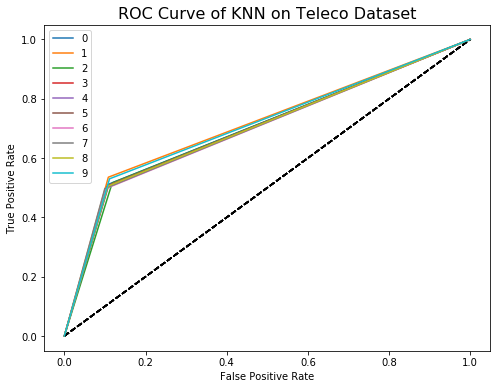

In [138]:
# We want to find which has the best ROC Curve and confusion matrix
plt.figure(figsize = (8,6))

############################################################################################
#
## Grid search feel free to run, it'll take you about 5 mins to run
#
############################################################################################
for i in range(0,10):
    knn_loop = KNeighborsClassifier(n_neighbors=results['params'][i]['n_neighbors'], p = results['params'][i]['p'],weights=results['params'][i]['weights'])
    loop_params = results['params'][i]
    knn_loop.fit(telco_X_train, y_train)
    y_pred = knn_loop.predict(telco_X_test)
    y_prob = knn_loop.predict_proba(telco_X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test,y_pred )
    auc_score = roc_auc_score(y_test, y_prob)
    print(f'{loop_params} auc score of {auc_score}')
    plt.title('ROC Curve of KNN on Teleco Dataset', fontsize = 16)
    plt.plot([0,1],[0,1], 'k--')
    plt.plot(fpr, tpr, label = i)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()


## Is there a difference in our top 10 models - KNN Model Comparison

#### Conclusion
1. for the most part, there is no difference in our top 10 performing this
 - we see that the IQR of all models overlaps the mean score of all models. This tells us that all models are similar
 - we do notice some outliers but these appear to be more due to chance
  - After concluding the top 10 scores are similar, we choose model #4 in chart 4b as the CV scores are like the other top performing models. What made us choose this, it had the highest uniform weight model accuracy.
 

C:\Users\JOSH\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\JOSH\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\JOSH\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\JOSH\Anaconda3\lib\site-packages\sklearn\utils\de

Text(0.5,0,'Rank order of model performance via GridSearchCv')

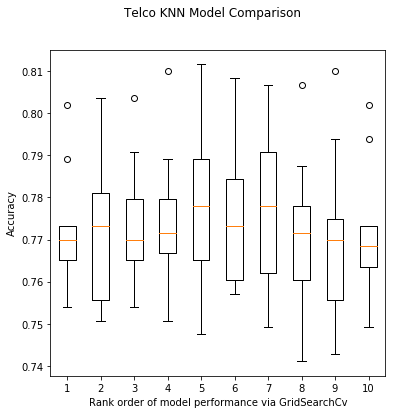

In [128]:
cv = 9
telco_knn_top10_models = []
results = pd.DataFrame(knn_grid.cv_results_)
results = results.sort_values(by='rank_test_score').reset_index()

############################################################################################
#
## Grid search feel free to run, it'll take you about 5 mins to run
#
############################################################################################
for i in range(0,10):
    knn_loop = KNeighborsClassifier(n_neighbors=results['params'][i]['n_neighbors'], p = results['params'][i]['p'],weights=results['params'][i]['weights'])
    loop_params = results['params'][i]
    knn_loop.fit(telco_X_train, y_train)
    telco_knn_top10_models.append(cross_val_score(knn_loop,  telco_X_train, y_train,cv=cv,n_jobs = -1, scoring='accuracy'))

    #Plot the best results
my_names = np.arange(1,11)
fig = plt.figure(figsize=(6,6))
fig.suptitle('Telco KNN Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(telco_knn_top10_models)
ax.set_xticklabels(my_names)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Rank order of model performance via GridSearchCv')


# Telco confusion matrix of model selection

- overall it does pretty well. 78% overall and 51% of the total 1 labels

Normalized confusion matrix
[[0.894535   0.105465  ]
 [0.49453552 0.50546448]]


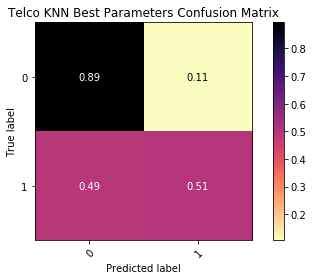

In [144]:
# We want to find which has the best ROC Curve and confusion matrix
# plt.figure(figsize = (8,6))
best_knn_telcom.fit(telco_X_train, y_train)
knn_cm_pred = best_knn_telcom.predict(telco_X_test)
classes = unique_labels(y_test, knn_cm_pred)
plot_confusion_matrix(y_test, knn_cm_pred,classes = classes,
                      normalize=True,
                      title=f'Telco KNN Best Parameters Confusion Matrix',
                      cmap=plt.cm.magma_r)

# Telco Neural Net

#### Things to Test:
- Different Activation functions sigmoid, tanh, relu,softmax, softsign
- Different hidden layers 2,3,4,5
- what are the validation curves

In [131]:
telco_rows, telco_cols = telco_x_train.shape

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience = 5)

In [206]:
layers_to_test = 1
activation = 'sigmoid'
activ_len= len(activation)
starting_node = [20, 60, 120, 240, 500, 1000]
epochs = 300
train_acc = []
test_acc = []
cv = 9
kfold = KFold(n_splits=cv,shuffle=True)

for node_size in starting_node:
    for train, test in kfold.split(telco_X_train, y_train):
        train_acc_, test_acc_ = evaluate_nn(layers_to_test,node_size,telco_X_train[train], y_train[train], telco_X_train[test],  y_train[test],
                                           activation = activation, epochs = epoch,early_stopping=5, batch_size = 400,verbose=0,class_pred=False)
        train_acc.append(train_acc_)
        test_acc.append(test_acc_)

In [221]:
new_train_acc = np.reshape(np.array(train_acc),(9,len(starting_node)))
new_test_acc = np.reshape(np.array(test_acc),(9,len(starting_node)))

### How many nodes in hidden layer 1?
 - We first looked at how many nodes in the first hidden layer is best. We choose 120 as this gave us the best accuracy vs the other selections we had. We are only looking at the first hidden layer because in each preceding hidden layer we will be decreasing the nodes in the next layer by 1/2. 
We are choosing this approach because the professor has stated this is the approach he normally takes and sees good results with it, therefore, let’s test it out and see the results that we get. 

Text(0.5,0,'# of Nodes in hidden layer')

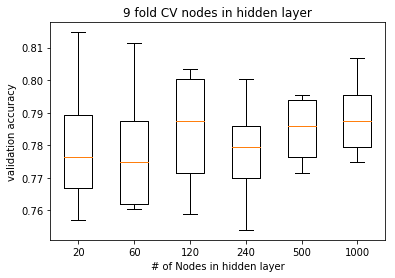

In [239]:
#plt.plot(starting_node,new_train_acc.T, label= 'Training')
#plt.plot(starting_node,new_test_acc.T, label = 'Testing')
#plt.legend()
plt.boxplot(new_test_acc)
plt.get_figlabels()
plt.xticks(range(1,7),starting_node)
plt.title('9 fold CV nodes in hidden layer')
plt.ylabel('validation accuracy')
plt.xlabel('# of Nodes in hidden layer')

# Telcon Neural Net Accuracy & Loss as a function of hidden layers, epochs and activation functions

1. We are testing accuracy across number of hidden layers,  activations and epochs
2. We are starting with 120 nodes and in each preceding hidden layer we are decreasing by 1/2 vs nodes in l-1 where l is layer we are currently in
  - We are choosing this approach because the professor has stated this is the approach he normally takes and sees good results with it, therefor, we will test it

2. Findings- Looking across all hidden layers and activations they all achieve similar accuracy scores. Across all different forms of activation functions adding more layers doesn’t improve accuracy. Meaning the addition of another hidden layer does not incrementally increase accuracy.
 - Sigmoid function findings - The sigmoid function doesn’t appear to overfit the data in layers 1& 2 but 3& 4 does overfit the data as training and validation curves diverge around epoch 150. It achieves peak accuracy between 25-150 epochs. As hidden layers increase on the sigmoid activation function the number of epochs for it to reach peak accuracy increases. 
 - TanH function appears to output similar accuracy scores to sigmoid function across all layers.  This appears to give us consistent results no matter how many layers we add to it. It seems very stable. 
 - Relu function arrives at its optimal accuracy quickly, 10-50 epoch across all layers, but wow does it overfit the data after those epochs. The training accuracy and test accuracy diverge very quickly. 
 - Softsign function like relu displays overfitting with our data, as the train and validation accuracy diverge from each other. Although the divergence takes longer(epoch wise) than relu to overfit.
 - Softmax function really shows that as you increase layers one needs to increase the number of epochs. With the first two hidden layers we achieve peak accuracy at 100- 150  epochs and layers 4 & 5 need more than 300 epochs to achieve optimal performance. What’s interesting, we can see how neural nets find local minima and not global minima. At 2-3 hidden layers we see this downward trajectory in our accuracy, this is the result of finding local minima.

 
 
#### Next Steps
 - As we want to choose a model which is simple but still achieves the best results we will choose a 1 hiddent layer, 75 epoch neural net. We will test it across multiple activation functions to see which is optimal

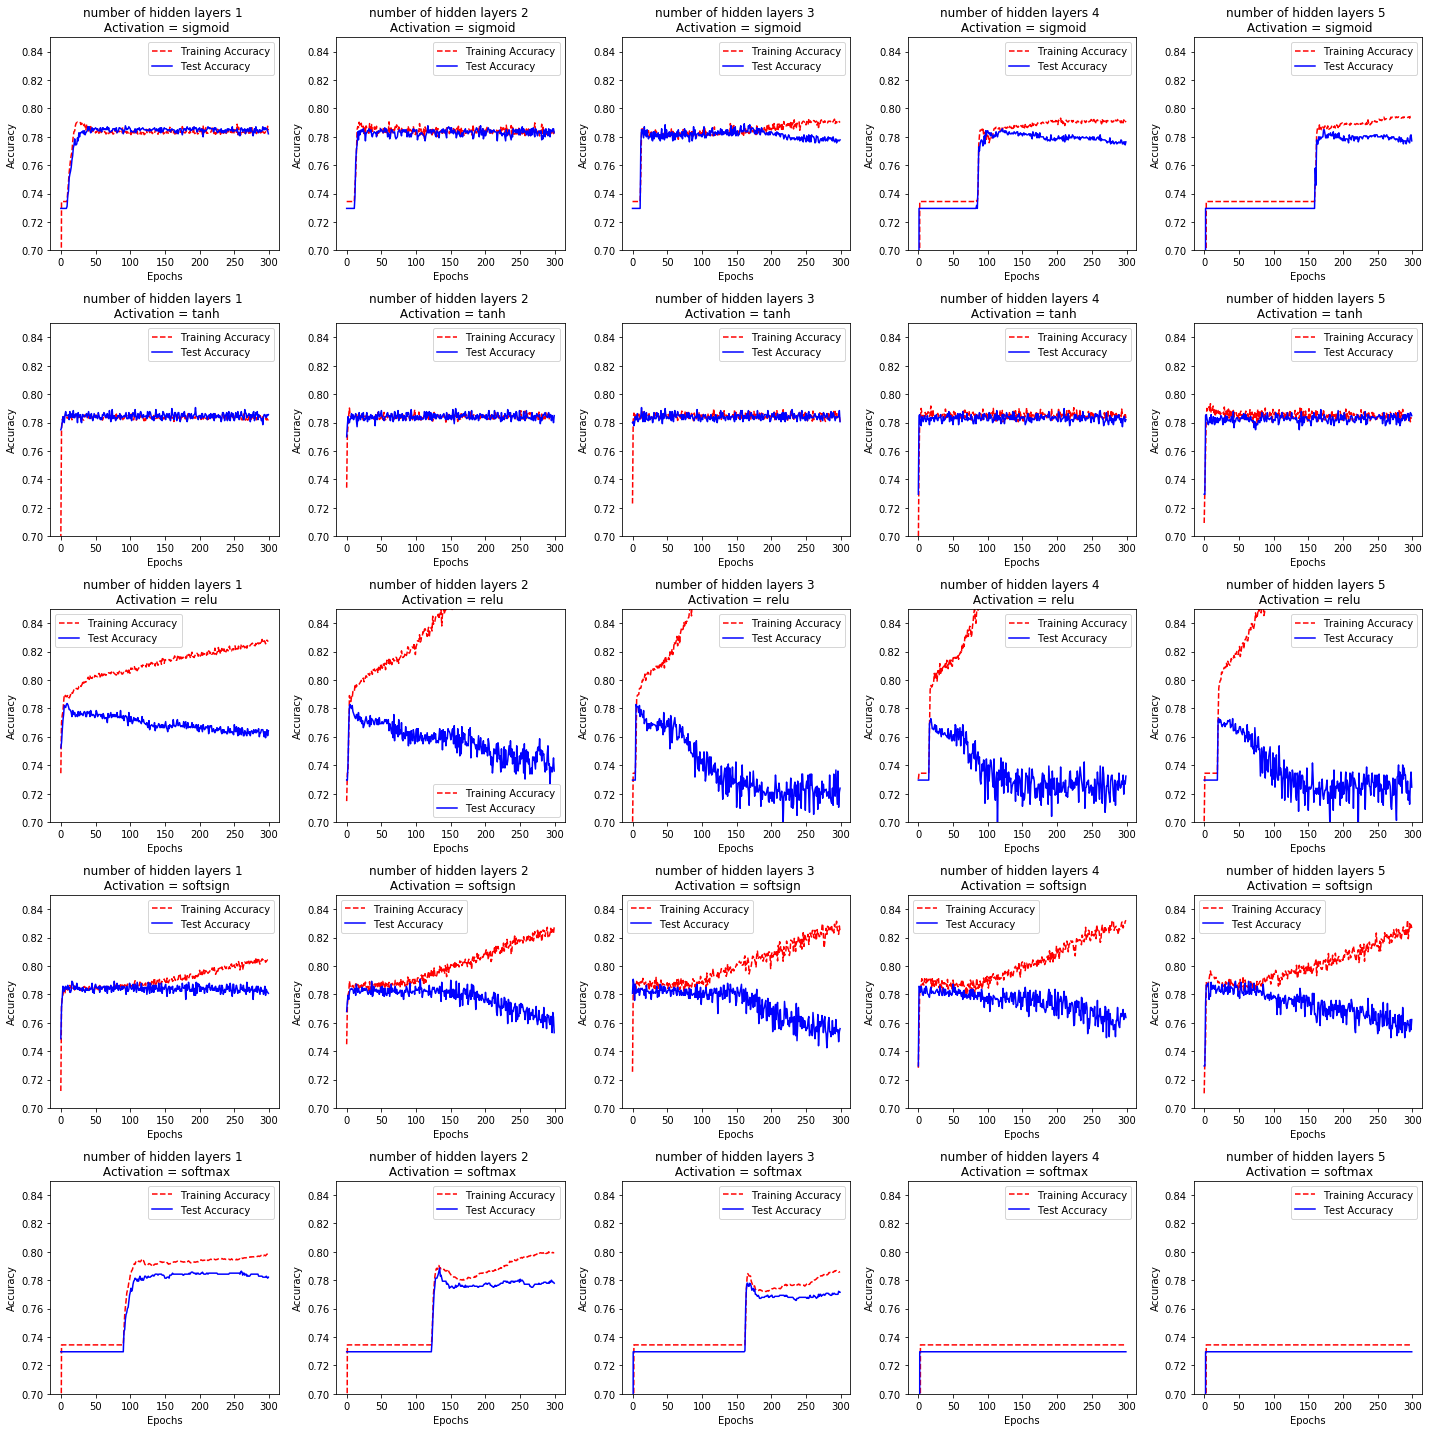

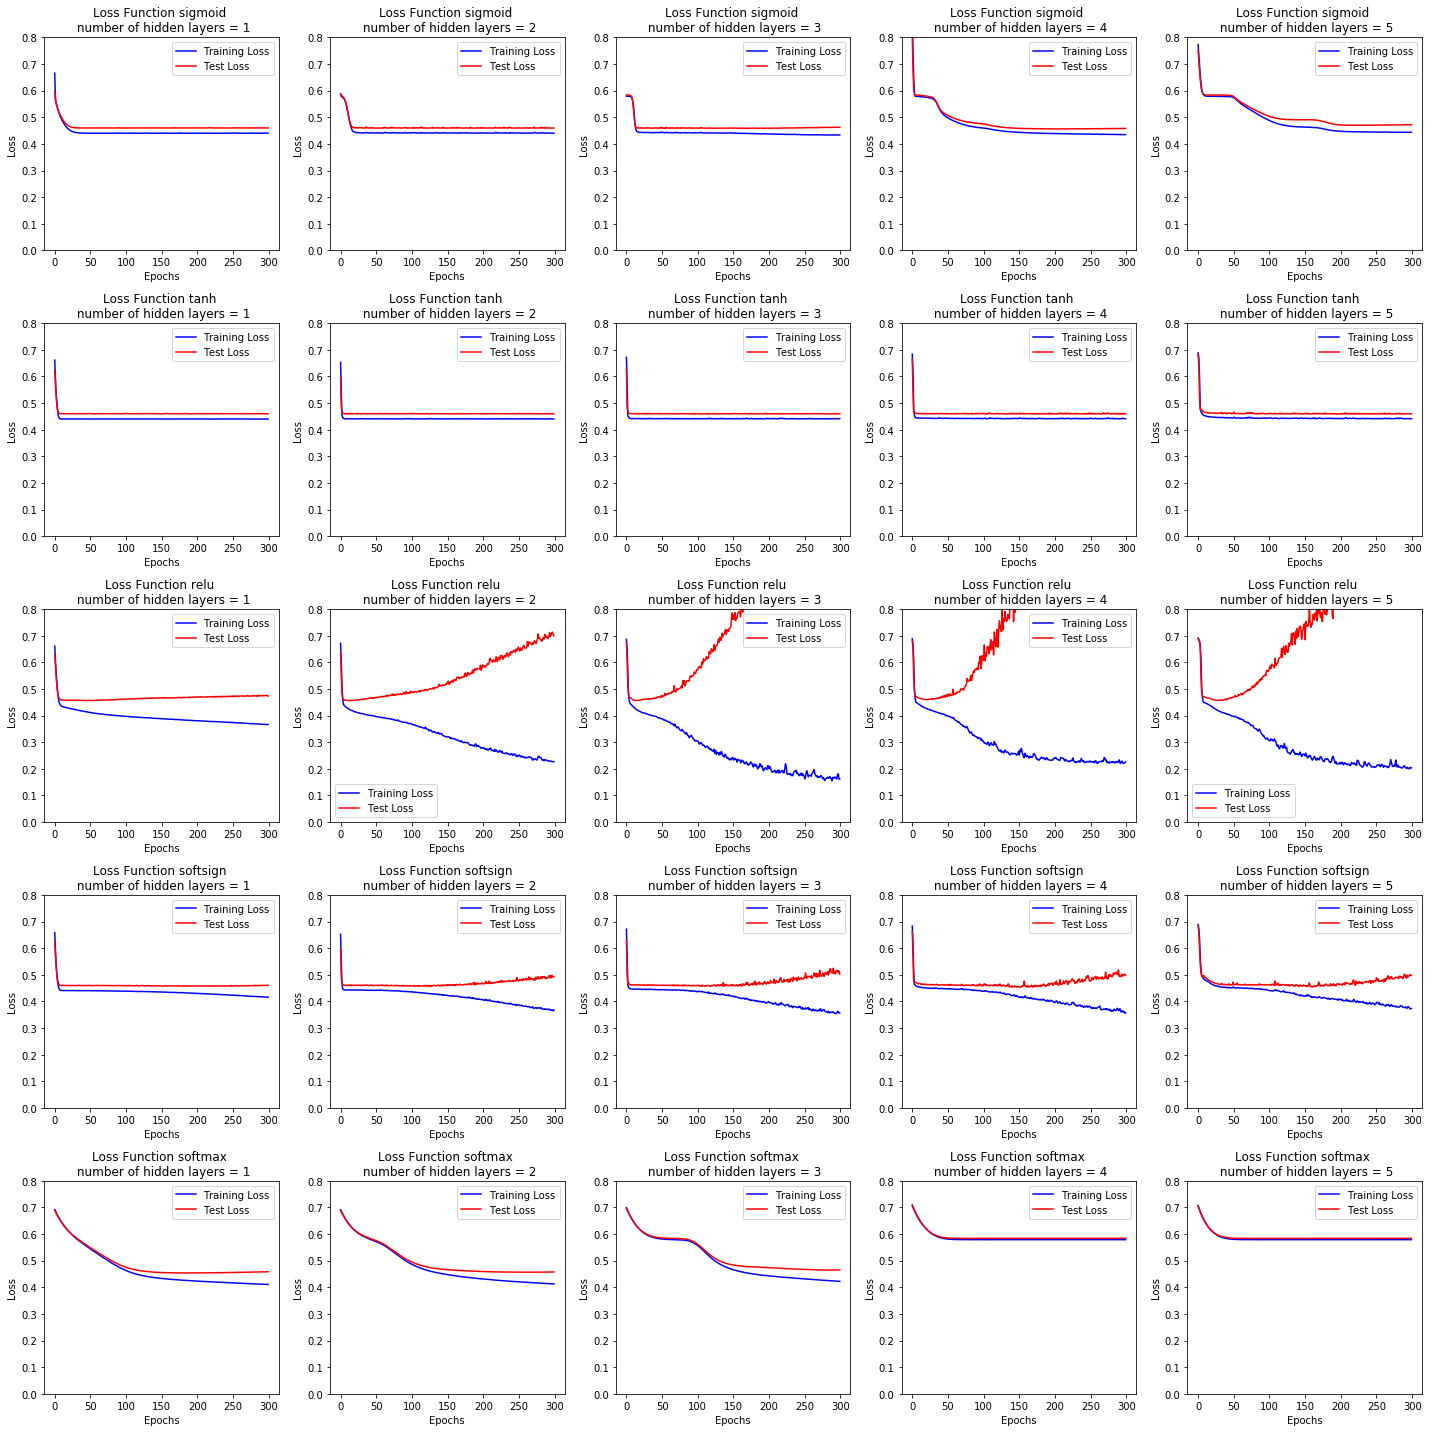

In [240]:
layers_to_test = [1,2,3,4,5]
activation = ['sigmoid', 'tanh', 'relu', 'softsign', 'softmax']
activ_len= len(activation)
starting_node = 120
epochs = 300


fig, axs = plt.subplots(nrows=activ_len,ncols=len(layers_to_test), figsize=(20, 20), facecolor='w', edgecolor='k')
axs = axs.ravel()

figs, axes = plt.subplots(nrows=activ_len,ncols=len(layers_to_test), figsize=(20, 20), facecolor='w', edgecolor='k')
axes = axes.ravel()

for row,activ in enumerate(activation):
    row = row*len(layers_to_test)
    for i in layers_to_test:
        history = layers_exp(i,starting_node,telco_x_train, telco_y_train, telco_x_val, telco_y_val, activation = activ, epochs = epochs, batch_size = 400,verbose=0, class_pred=False)

        # Get training and test accuracy histories
        training_accuracy = history.history['acc']
        test_accuracy = history.history['val_acc']
        loss = history.history['loss']
        val_loss = history.history['val_loss']

        # Create count of the number of epochs
        layer_count = range(1, len(layers_to_test)+1)
        subplot_numb = i-1 + row
        second_row = subplot_numb + len(layers_to_test)

        # Visualize accuracy history
        axs[subplot_numb].plot(training_accuracy, 'r--')
        axs[subplot_numb].plot(test_accuracy, 'b-')
        axs[subplot_numb].legend(['Training Accuracy', 'Test Accuracy'])
        axs[subplot_numb].set_title(f'number of hidden layers {i} \n Activation = {activ}')
        axs[subplot_numb].set_xlabel('Epochs')
        axs[subplot_numb].set_ylabel('Accuracy')
        axs[subplot_numb].set_ylim(0.7,.85)

        axes[subplot_numb].plot(loss, 'b-')
        axes[subplot_numb].plot(val_loss, 'r-')
        axes[subplot_numb].legend(['Training Loss', 'Test Loss'])
        axes[subplot_numb].set_title(f'Loss Function {activ} \n number of hidden layers = {i}')
        axes[subplot_numb].set_xlabel('Epochs')
        axes[subplot_numb].set_ylabel('Loss')
        axes[subplot_numb].set_ylim(0,.8)
fig.tight_layout()
figs.tight_layout()

# Telco Neural Net Performance

## Roc Curves to run
1. When judging performance we need to look at ROC Curves and AUC scores to determine how "good" one is vs another
2. In our results above a 1 hidden layer, 75 epoch, 120 node neural net appeared to have the highest accuracy but we want to see what the ROC curve and AUC score is

### Conclusion
1. After running the models against each other we see that they are all very similar.
 - We are choosing sigmoid as it performs like the other activation functions with the same hidden layers. 
 - Also, we have gone over this specific activation function in class. Another insight which gives us comfort in choosing sigmoid, if we look at the ROC curves across our activation functions, we see all of them put out a nearly identical AUC ROC score. The scores ranges between .826 - .8313 which again confirms they are similar. Since there’s almost no difference we pick an activation function we are comfortable with.

sigmoid had an auc score of 0.8225
The sigmoid % correct is 0.7991
tanh had an auc score of 0.8211
The tanh % correct is 0.797
relu had an auc score of 0.8318
The relu % correct is 0.8041
softsign had an auc score of 0.825
The softsign % correct is 0.8034
softmax had an auc score of 0.8266
The softmax % correct is 0.797


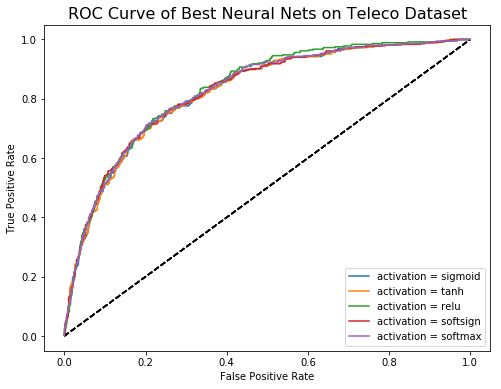

In [241]:
# We want to find which has the best ROC Curve and confusion matrix
activation = ['sigmoid', 'tanh', 'relu', 'softsign', 'softmax']
layers = 1
starting_node = 120
epoch = 75

plt.figure(figsize = (8,6))
for activ in activation:
    _,  pred, pred_prob = layers_exp(1,starting_node,telco_X_train, y_train, telco_X_test, y_test, activation = activ, epochs = epoch, batch_size = 400,verbose=0,class_pred=True)
    fpr, tpr, _ = roc_curve(y_test, pred_prob)
    auc_score = roc_auc_score(y_test, pred_prob)
    print(f'{activ} had an auc score of {np.round(auc_score, decimals = 4)}')
    confusion_mat = confusion_matrix(y_test,pred)
    print(f'The {activ} % correct is {np.round(np.diag(confusion_mat).sum()/confusion_mat.sum(),decimals = 4)}')
    plt.title('ROC Curve of Best Neural Nets on Teleco Dataset', fontsize = 16)
    plt.plot([0,1],[0,1], 'k--')
    plt.plot(fpr, tpr, label = f'activation = {activ}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

# Telco Neural Net Learning Curve
 - Overall we have a good model.
 - It has low bias/low variance
 - training and test accuracy converges

In [343]:
tel_nn_train_score, tel_nn_test_score, tel_nn_size = learn_curve_nn(n_layers=1,starting_nodes=120,epochs=75,X=telco_X_train,y=y_train,activation='sigmoid',batch = 400,cv = 9, train_sizes=[.2,.4,.6,.8])

C:\Users\JOSH\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


<module 'matplotlib.pyplot' from 'C:\\Users\\JOSH\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

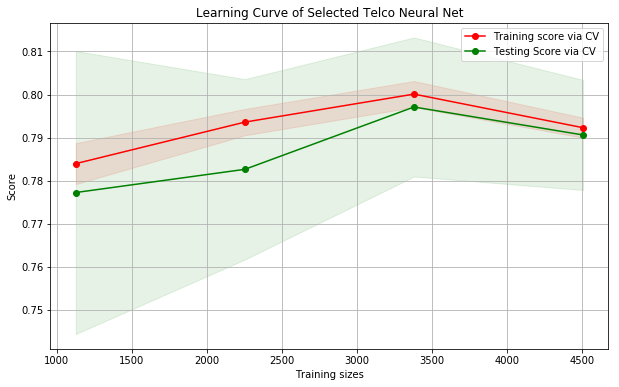

In [344]:
plot_learning_curves_nimb(tel_nn_size, np.array(tel_nn_train_score), np.array(tel_nn_test_score),title='Learning Curve of Selected Telco Neural Net',xlabel='Training sizes')

# Telco Performance - Confusion Matrix

#### Conclusion
1. Our sigmoid function has a good pretty good confusion matrix. Overall, we are predicting 78% of labels correctly

Normalized confusion matrix
[[0.915628   0.084372  ]
 [0.53278689 0.46721311]]


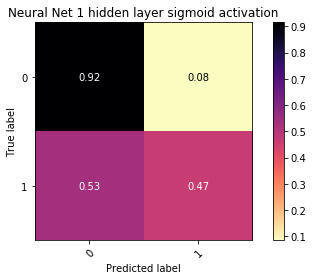

In [243]:
# We want to find which has the best ROC Curve and confusion matrix
activation = ['sigmoid']
layers = 1
starting_node = 120
epoch = 75
classes = unique_labels(y_test, pred)

# plt.figure(figsize = (8,6))
for activ in activation:
    _,  pred, pred_prob = layers_exp(layers,starting_node,telco_X_train, y_train, telco_X_test, y_test, activation = activ, epochs = epoch, batch_size = 400,verbose=0,class_pred=True)
    classes = unique_labels(y_test, pred)
    plot_confusion_matrix(y_test, pred,classes = classes,
                          normalize=True,
                          title=f'Neural Net 1 hidden layer {activ} activation',
                          cmap=plt.cm.magma_r)

# Teleco - Final Model Comparison

#### Compare all models 

1. Reasons for picking this model
 - All Models have similar scores except for poly.
 - We will go with SVM Linear as it's easier to fit than others and puts out similar accuracy scores


In [244]:
cv = 9
tel_all_model_results = []

#Best Linear Model
svmtel = svm.SVC(C = 1, kernel = 'linear', probability=True)
svmtel.fit(telco_X_train,y_train)
tel_all_model_results.append(cross_val_score(svmtel, telco_X_test, y_test, cv=cv, scoring='accuracy'))

#Best RBF Model
svmclf_rbf = svm.SVC(C = 1, kernel = 'rbf', gamma = .0223, probability=True)
svmclf_rbf.fit(telco_X_train,y_train)
tel_all_model_results.append(cross_val_score(svmclf_rbf, telco_X_test, y_test, cv=cv, scoring='accuracy'))

#Best Poly Model
svmclf_p = svm.SVC(C = 3, kernel = 'poly',degree=3, gamma = .0223, probability=True)
svmclf_p.fit(telco_X_train,y_train)
tel_all_model_results.append(cross_val_score(svmclf_p,  telco_X_test, y_test,cv=cv, scoring='accuracy'))

#best Decision tree
clf_dt_p = tree.DecisionTreeClassifier(max_depth=3)
clf_dt_p.fit(telco_X_train,y_train)
tel_all_model_results.append(cross_val_score(clf_dt_p,  telco_X_test, y_test,cv=cv, scoring='accuracy'))

#best Boosted Tree
adaclf_tel = AdaBoostClassifier(n_estimators=10)
adaclf_tel.fit(telco_X_train,y_train)
tel_all_model_results.append(cross_val_score(adaclf_tel,  telco_X_test, y_test,cv=cv, scoring='accuracy'))

# Best KNN Class
telco_knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=95, p=1,
           weights='uniform')
telco_knn.fit(telco_X_train,y_train)
tel_all_model_results.append(cross_val_score(telco_knn,  telco_X_test, y_test,cv=cv, scoring='accuracy'))

# Best Neural Net
layers = 1
starting_node = 120
epoch = 75
nn_cv = []
kfold = KFold(n_splits=cv,shuffle=True)
for train, test in kfold.split(telco_X_train, y_train):
    train_acc, test_acc = evaluate_nn(layers,starting_node,telco_X_train[train], y_train[train], telco_X_train[test],  y_train[test], 
                                       activation = 'sigmoid', epochs = epoch,early_stopping=5, batch_size = 400,verbose=0,class_pred=False)
    nn_cv.append(test_acc)
tel_all_model_results.append(np.array(nn_cv))

# Final Teclo Model Comparisons
 - SVM linear is the best model. It has the highest mean accuracy which falls outside of other models IQR. It takes less time to fit than a model similar to it SVM-RBF, therefore, we choose SVM Linear

Text(0,0.5,'Accuracy')

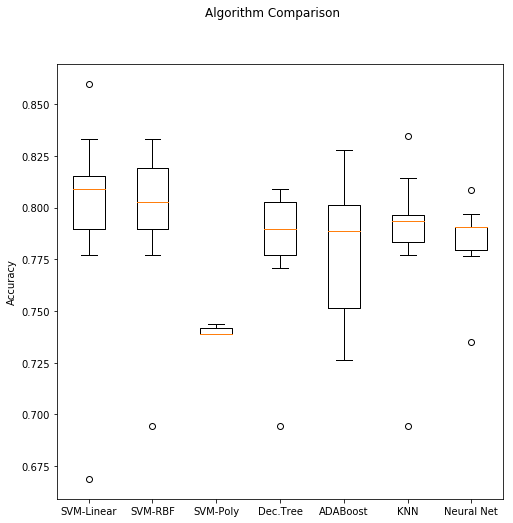

In [245]:
#Plot the best results
my_names = ['SVM-Linear', 'SVM-RBF','SVM-Poly', 'Dec.Tree','ADABoost', 'KNN', 'Neural Net']
fig = plt.figure(figsize=(8,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(tel_all_model_results)
ax.set_xticklabels(my_names)
ax.set_ylabel('Accuracy')

# Facebook Data Begins Here

# Load Facebook data 

#### Note we are only using Variant 1

In [15]:
colnames = ['page_pop',
           'page_check','page_talk_bt','page_cat','tot_min','tot_max','tot_avg','tot_med','tot_std','l24_min',
            'l24_max','l24_avg','l24_med','l24_std','l24_48_min','l24_48_max','l24_48_avg','l24_48_med','l24_48_std',
            'l48_72_min','l48_72_max','l48_72_avg','l48_72_med','l48_72_std','diff_24_48_min','diff_24_48_max','diff_24_48_avg',
            'diff_24_48_med','diff_24_48_std','num_comm_pre','num_comm_l24','num_comm_pre_24_48','num_comm_fir_24','num_comm_diff_24_48',
            'base_time','pst_len','pst_shre_cnt','pst_prom_stat','h_hours','pub_sun','pub_mon','pub_tue','pub_wed','pub_thu','pub_fri',
            'pub_sat','base_sun','base_mon','base_tue','base_wed','base_thu','base_fri','base_sat','comm_h_hours'
            ]

In [16]:
train_df = pd.read_csv('..\data\Dataset\Training\Features_Variant_1.csv', header=None)
test_df = pd.concat([pd.read_csv(f,header=None,nrows=1000)for f in glob.glob('..\data\Dataset\Testing\TestSet\Test_Case_*.csv')], ignore_index=True)

final_df = pd.concat([train_df,test_df])
final_df.head()

new_cols = dict(zip(train_df.columns,colnames))
final_df.rename(new_cols, axis='columns',inplace=True)

# Convert Facebook Data to Binary Classification

1. Addition of num_comm_l24h^2.
 - Num_comm_l24 is + correlated with the target variable adding in the squared term to account for a quadratic fit. 

1. Converting from continuous to binary
 - we are saying if there is 1 or more comments in the last H hours  then we will classify it as 1 else 0

In [17]:
final_df['num_comm_l24_sq'] = final_df['num_comm_l24']**2
final_df['page_talk_l24'] = final_df['page_talk_bt']*final_df['num_comm_l24']
final_df['comm_h_hour_bin'] = np.where(final_df['comm_h_hours'] >0 ,1,0)
final_df2 = final_df.drop(columns = 'comm_h_hours')
X_fb = final_df2.iloc[:,:-1].values
y_fb = final_df2.iloc[:,-1].values

# Facebook Exploratory Analysis

 - 73% of our features are positvely correlated with our target variable
 - our least correlated variable is -23% which would be considered weakly classified
 - We will leave all the variables in as they add important information with respect to target
 - Our class balance is 55%/45%

In [18]:
np.abs(final_df.corr(method='pearson')['comm_h_hours']).sort_values(ascending=False)[:10]

comm_h_hours           1.000000
num_comm_l24           0.503890
num_comm_diff_24_48    0.367229
l24_avg                0.352976
num_comm_fir_24        0.342350
l48_72_avg             0.338323
tot_avg                0.338255
num_comm_pre           0.328437
l24_med                0.325067
l48_72_med             0.324048
Name: comm_h_hours, dtype: float64

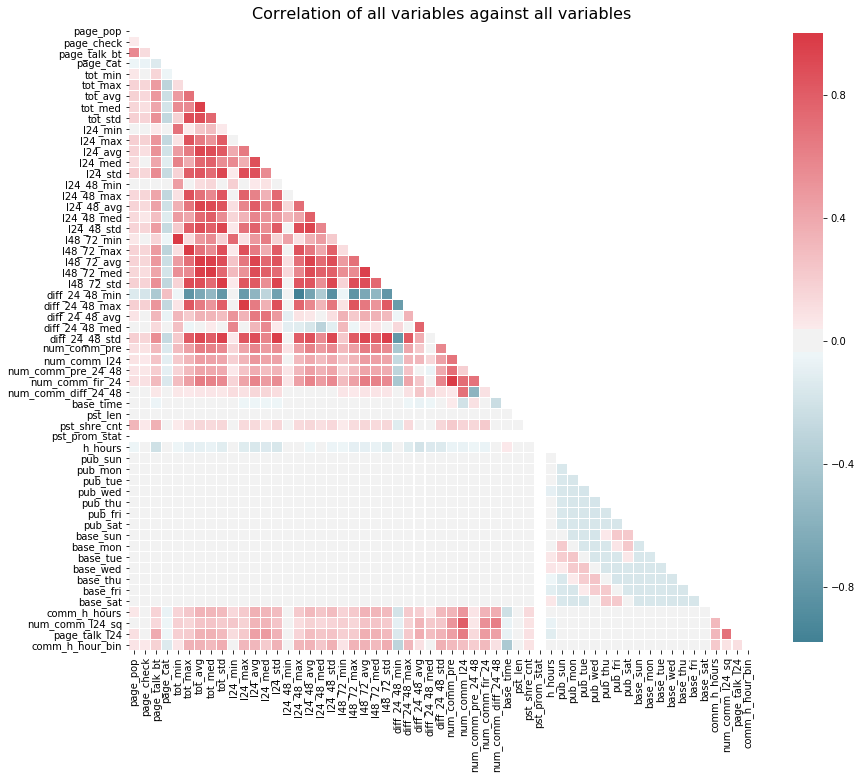

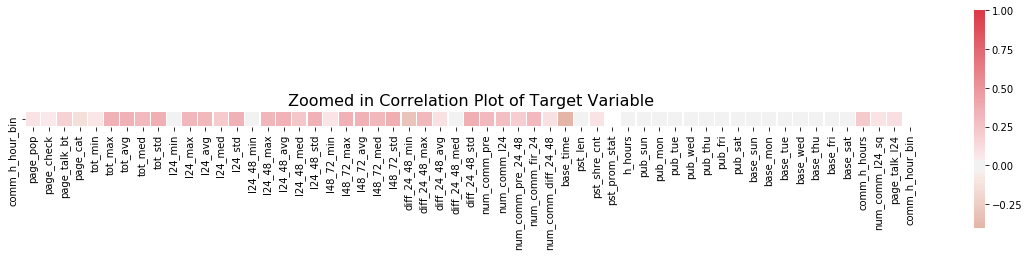

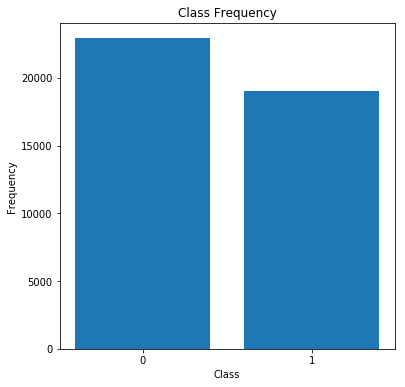

In [19]:
final_df.loc[:,['page_pop', 'page_talk_bt', 'tot_avg', 'l24_avg', 'l24_48_avg', 'l48_72_avg', 'pst_len', 'pst_shre_cnt', 'comm_h_hours']].corr(method='pearson')
corr = final_df.corr(method='pearson')
#corr['comm_h_hours'].sort_values(ascending=False)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
ax.set_title('Correlation of all variables against all variables', fontsize = 16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.1, cbar_kws={"shrink": .8})


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 10, as_cmap=True)

ax.set_title("Zoomed in Correlation Plot of Target Variable", fontsize = 16)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr[-1:], mask=mask[-1:], cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.15, cbar_kws={"shrink": 1})

unique, counts = np.unique(final_df.comm_h_hour_bin, return_counts=True)
plt.figure(figsize = (6,6))
plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0,1], unique)
plt.show()

## Facebook Feature Scaling
1. We first split our data into a 80/20 split of training and test as this is what we've done in class then further split training 80/20 to create a training/validation set
1. After split, we scale ours features. Scaling the features to make sure they are all on the same scale not only helps with computation time but also allows regularization to work properly
1. We need to split our data again because if we use our testing set for validation we induce an optimistic bias into our testing evaluation
1. performing PCA to be consistent with other hwk assignments and to reduce dimensonality/correlation between variables


In [21]:
fb_train_all_x, fb_test_all_x, fb_train_all_y, fb_test_all_y = train_test_split(X_fb, y_fb, test_size = .20, shuffle = True,random_state= 20190413)

###############################################################################
#
# Top 7 correlated features
#
###############################################################################

# top 7 features
#top_n = ['num_comm_diff_24_48','num_comm_l24','l24_avg','num_comm_fir_24','pst_shre_cnt','l48_72_avg','tot_avg','num_comm_pre','page_talk_bt','num_comm_l24_sq','page_talk_l24']
top_n = ['num_comm_diff_24_48','num_comm_l24','h_hours','pst_shre_cnt','page_talk_bt','num_comm_l24_sq','page_talk_l24']
X_fb_top = final_df2.loc[:,top_n].values
y_fb_top = final_df2.loc[:,'comm_h_hour_bin'].values

# Top correlated features
fb_topn_x_train_all, fb_topn_x_test_all, fb_topn_y_train_all, fb_topn_y_test_all = train_test_split(X_fb_top, y_fb_top, test_size = .20, shuffle=True)

# Scale the top features
topn_xscaler = StandardScaler().fit(fb_topn_x_train_all)
fb_topn_train_sc = topn_xscaler.transform(fb_topn_x_train_all)
fb_topn_test_sc = topn_xscaler.transform(fb_topn_x_test_all)

# Train/Valid split of scaled features top n features
fb_topn_x_train_lim, fb_topn_x_val, fb_topn_y_train_lim, fb_topn_y_val = train_test_split(fb_topn_train_sc, fb_topn_y_train_all, test_size = .20)

###############################################################################
#
# features from last assignments
# we found these to offer too high of variance
#
###############################################################################
# All Features with original 80/20
full_xscaler = StandardScaler().fit(fb_train_all_x)
x_train_scaled_fb = full_xscaler.transform(fb_train_all_x)
x_test_scaled_fb = full_xscaler.transform(fb_test_all_x)

#if we want to do PCA on top n we can
pca = PCA(n_components=.90)
x_train_pca_fb = pca.fit_transform(x_train_scaled_fb)
x_test_pca_fb = pca.transform(x_test_scaled_fb)
x_train_pca_fb.shape

# training and validation set all features
fb_x_train, fb_x_val, fb_y_train, fb_y_val = train_test_split(x_train_pca_fb, fb_train_all_y,test_size = .20, shuffle=True)

C:\Users\JOSH\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\JOSH\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\JOSH\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Facebook KNN Grid Search|

- 5 fold cross validation
- trying between 20 and 220 neighbors in increments of 20
- We want to experiment with a large range and different weighting metrics
- we initially used the entire dataset but the model suffered from high variance 
- we then had to go back and use the top 5 correlated variables + 2 other polynominal terms which added in some flexibility to the model

In [22]:
fb_k_range = np.where(np.arange(20,221,20) ==0,1,np.arange(20,221,20))
fb_param_grid = {'n_neighbors': fb_k_range,
              'weights':['uniform','distance'],
             'p': [1,2]}

In [24]:
fbknn = KNeighborsClassifier()
############################################################################################
#just 
## Grid search feel free to run, it'll take you about 5 mins to run
#
############################################################################################
fb_knn_grid = GridSearchCV(fbknn,param_grid=fb_param_grid,n_jobs=-1,cv=5, verbose=2)
fb_knn_grid.fit(fb_topn_x_train_lim,fb_topn_y_train_lim)
# trainining on 80%of the entire data
#fb_knn_grid.fit(fb_topx_train_sc,fb_topn_y_train_all)

############################################################################################
#just 
## we originally tried our variables in the first two assignments but we suffered from high variance
#
############################################################################################
#fb_knn_grid = GridSearchCV(fbknn,param_grid=fb_param_grid,n_jobs=-1,cv=5, verbose=2)
#fb_knn_grid.fit(fb_x_train,fb_y_train)



Fitting 5 folds for each of 44 candidates, totalling 220 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:  3.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220]), 'weights': ['uniform', 'distance'], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [52]:
# Grab the scores
fb_knn_grid_mean_score = fb_knn_grid.cv_results_['mean_test_score'].reshape(len(fb_k_range),len(fb_param_grid.keys())+1)
fb_knn_grid_std_score = fb_knn_grid.cv_results_['std_test_score'].reshape(len(fb_k_range),len(fb_param_grid.keys())+1)
fb_knn_grid_mean_time = fb_knn_grid.cv_results_['mean_score_time'].reshape(len(fb_k_range),len(fb_param_grid.keys())+1)
fb_knn_grid_std_time= fb_knn_grid.cv_results_['std_score_time'].reshape(len(fb_k_range),len(fb_param_grid.keys())+1)

# Look at grid search results
results_fb = pd.DataFrame(fb_knn_grid.cv_results_)
results_fb = results_fb.sort_values(by='rank_test_score').reset_index(drop=True)

C:\Users\JOSH\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\JOSH\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\JOSH\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\JOSH\Anaconda3\lib\site-packages\sklearn\utils\de

In [26]:
# What is our best estimator and fit it
fb_best_knn = fb_knn_grid.best_estimator_
fb_best_knn.n_jobs = -1
#fb_best_knn.n_neighbors = 50
#fb_best_knn.n_neighbors = 60
#fb_best_knn.fit(fb_topn_x_train_,fb_topn_y_train_)

# fit on the limited dataset
fb_best_knn.fit(fb_topn_x_train_lim,fb_topn_y_train_lim)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=40, p=1,
           weights='uniform')

# Facebook KNN Learning Curves
### Plot 1 - 64% of data or training/validation
1. We wanted to see if our training set on 64% of the data suffered from high bias/variance. We conclude that it doesn't suffer from them as the accuracy on the training and testing converges as training examples increase

### Plot 2 - 80% of data or training/test
1. We wanted to see, as we provide more and more training examples doe we suffer from high bias/variance. Conclusion, no we do not suffer from high bias/bvariance. We conclude our model doesn't suffer from high bias/variance


#### Why did we use train/validation/test?
1. We know that if we fit the model on the training set then evaluate on the testing set and repeat this process our we can introduce optimisitic bias into our model. In order to prevent this we split the data into train/validation/test. 

<module 'matplotlib.pyplot' from 'C:\\Users\\JOSH\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 432x288 with 0 Axes>

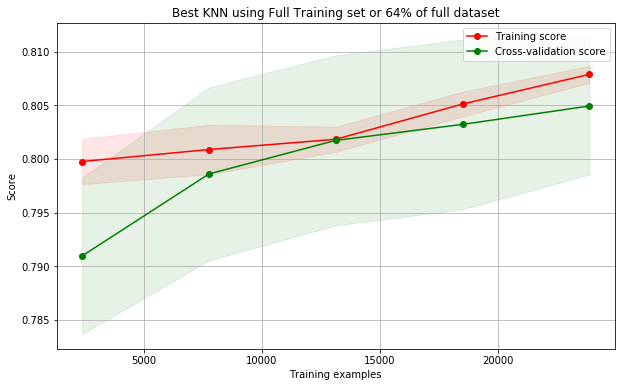

<Figure size 432x288 with 0 Axes>

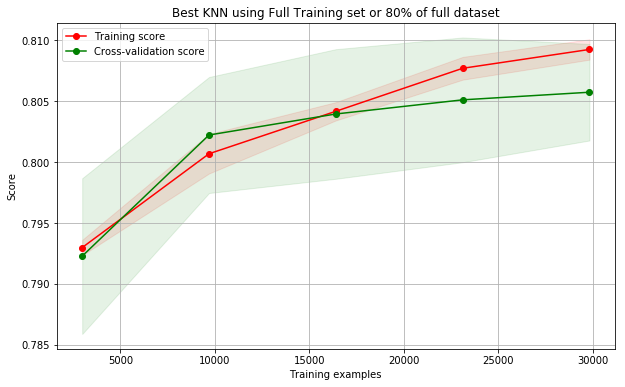

In [342]:
fb_best_params_selected = {'n_neighbors': 80, 'p': 1, 'weights': 'uniform'}
fb_best_knn= KNeighborsClassifier(n_neighbors=fb_best_params_selected['n_neighbors'],p = fb_best_params_selected['p'], weights = fb_best_params_selected['weights']
                                  ,n_jobs=-1)
fb_best_knn.fit(fb_topn_train_sc, fb_topn_y_train_all)
plt.figure()
plot_learning_curve(fb_best_knn,'Best KNN using Full Training set or 64% of full dataset',fb_topn_x_train_lim,fb_topn_y_train_lim,cv=9,n_jobs=-1)
plt.figure()
plot_learning_curve(fb_best_knn,'Best KNN using Full Training set or 80% of full dataset',fb_topn_train_sc,fb_topn_y_train_all,cv=9,n_jobs=-1)

#plt.figure()
#plot_learning_curve(fb_best_knn,'Best KNN using Training  or 64% of full dataset',fb_x_train,fb_y_train,n_jobs=-1)
#plt.figure()
#plot_learning_curve(fb_best_knn,'Best KNN using Full Training set or 80% of full dataset',x_train_pca_fb,y_train_fb,n_jobs=-1)

# Facebook Performance Experiments

### Learning Curve - Accuarcy of # of neigbors
1. As the number of neighbors increase our training accuracy increases across all neighbors increases until we get to roughly 100 neighbors at which point it declines
1. Uniform and absolute distances appears to work better than weighted distance metrics
 - p value = 1 represents the manhattan distance or what's referred to as city block distance


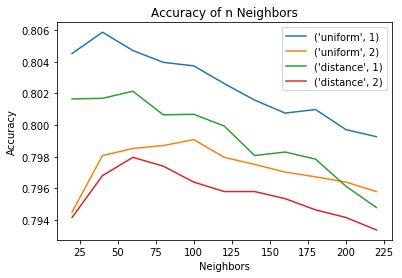

In [27]:
fb_labels = list(product(fb_param_grid['weights'], fb_param_grid['p']))
for fb_y_arr, fb_label in zip(fb_knn_grid_mean_score.T, fb_labels):
    plt.plot(fb_k_range,fb_y_arr, label=fb_label)
plt.ylabel('Accuracy')
plt.xlabel('Neighbors')
plt.title('Accuracy of n Neighbors')
plt.legend()

#### Learning Curve - Time to Compute
1. Given that we are only fitting on 7 varialbes our dimensonality is pretty small. Therefore the fitting time is pretty quick 
 - Computation scoring time vs neighbors fit– Overall the scoring is fast(< 3 sec) given our search space. We should expect that as neighbors increase scoring time should increase and it does. When choosing a model with scoring time in mind, any model will be sufficient within our limited search space as scoring time is fast.

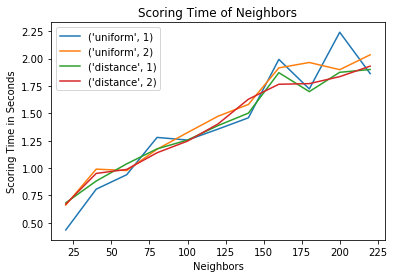

In [55]:
for fb_y_arr, fb_label in zip(fb_knn_grid_mean_time.T, fb_labels):
    plt.plot(fb_k_range,fb_y_arr, label=fb_label)
plt.ylabel('Scoring Time in Seconds')
plt.xlabel('Neighbors')
plt.title('Scoring Time of Neighbors')
plt.legend()

# Facebook KNN - Model Comparison part 2
## Is there a difference in our top 10 models

#### Conclusion
1. No, there is no difference in our top 10 performing models
 - Our conclusion is the top 10 models are very very similar. 
 - When we look at the ROC Curve for our top 10 performing models via grid search, they perform similar to each other. 
 - Since the ROC curve lines are on top of each other we then looked at the AUC score. The AUC scores range from.876 - .881 on our testing set, we conclude these models are similar. 


{'n_neighbors': 40, 'p': 1, 'weights': 'uniform'} auc score of 0.8789727060004914
{'n_neighbors': 60, 'p': 1, 'weights': 'uniform'} auc score of 0.8793942900664842
{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'} auc score of 0.8778779120110514
{'n_neighbors': 80, 'p': 1, 'weights': 'uniform'} auc score of 0.8804197224910915
{'n_neighbors': 100, 'p': 1, 'weights': 'uniform'} auc score of 0.8815683500047211
{'n_neighbors': 120, 'p': 1, 'weights': 'uniform'} auc score of 0.8820124877666337
{'n_neighbors': 60, 'p': 2, 'weights': 'uniform'} auc score of 0.8783746303140468
{'n_neighbors': 40, 'p': 2, 'weights': 'uniform'} auc score of 0.8778646214402415
{'n_neighbors': 20, 'p': 2, 'weights': 'uniform'} auc score of 0.8763956329958782
{'n_neighbors': 140, 'p': 1, 'weights': 'uniform'} auc score of 0.8818206023537287


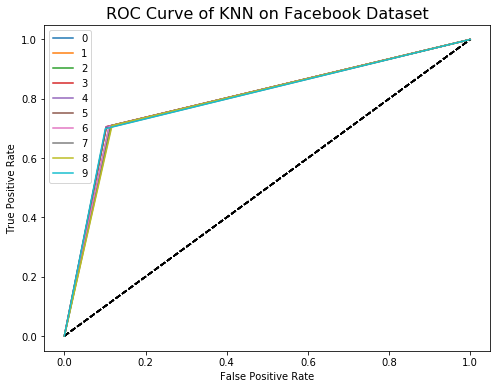

In [46]:
# We want to find which has the best ROC Curve and confusion matrix
plt.figure(figsize = (8,6))

############################################################################################
#
## Grid search feel free to run, it'll take you about 5 mins to run
#
############################################################################################
for i in range(0,10):
    fb_knn_loop = KNeighborsClassifier(n_neighbors=results_fb['params'][i]['n_neighbors'], p = results_fb['params'][i]['p'],weights=results_fb['params'][i]['weights'], n_jobs=-1)
    loop_params = results_fb['params'][i]
    fb_knn_loop.fit(fb_topn_x_train_lim, fb_topn_y_train_lim)
    y_pred = fb_knn_loop.predict(fb_topn_x_val)
    y_prob = fb_knn_loop.predict_proba(fb_topn_x_val)[:,1]
    fpr, tpr, _ = roc_curve(fb_topn_y_val,y_pred )
    auc_score = roc_auc_score(fb_topn_y_val, y_prob)
    print(f'{loop_params} auc score of {auc_score}')
    plt.title('ROC Curve of KNN on Facebook Dataset', fontsize = 16)
    plt.plot([0,1],[0,1], 'k--')
    plt.plot(fpr, tpr, label = i)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

# Facebook KNN - Model Comparison
## Is there a difference in our top 10 models - KNN Model Comparison

#### Conclusion
1. No, there is no difference in our top 10 performing this
 - we see that the IQR of all models overlaps the mean score of all models. This tells us that all models are similar
 - After concluding the top 10 scores are similar, we looked further at the chart and notice model 4 really stood out to us. 
    - What stood out to us was, it was one of the few models which didn’t have outlier scores and the upper whisker of the plot is higher than the others. 
    - The benefit of not having any outlier points, it tells us we can expect consistent results from the model.   
 
#### In conclusion we like the 4th best model in the fit as it doesn't have any outliers in either directions ie it will give us consistent results

Text(0.5,0,'Rank order of model performance via GridSearchCv')

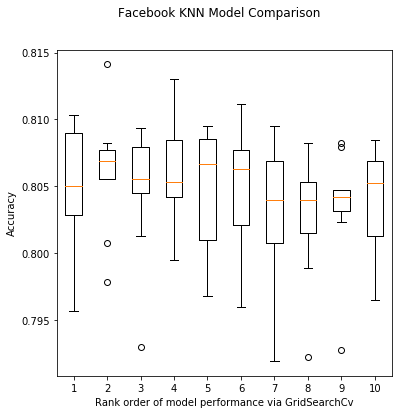

In [56]:
cv = 9
fb_knn_top10_models = []

############################################################################################
#
## Grid search feel free to run, it'll take you about 5 mins to run
#
############################################################################################
for i in range(0,10):
    fb_knn_loop = KNeighborsClassifier(n_neighbors=results_fb['params'][i]['n_neighbors'], p = results_fb['params'][i]['p'],weights=results_fb['params'][i]['weights'])
    fb_knn_loop.fit(fb_topn_x_train_lim, fb_topn_y_train_lim)
    fb_knn_top10_models.append(cross_val_score(fb_knn_loop,  fb_topn_train_sc, fb_topn_y_train_all,cv=cv,n_jobs = -1, scoring='accuracy'))

    #Plot the best results
my_names = np.arange(1,11)
fig = plt.figure(figsize=(6,6))
fig.suptitle('Facebook KNN Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(fb_knn_top10_models)
ax.set_xticklabels(my_names)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Rank order of model performance via GridSearchCv')

# Facebook Confusion Matrix

- Overall, our model performs similar on our test set as it did on our training set. 
- This tells us we have a consistent model and we are finding a model which isn’t suffering from variance/bias. 
- We have an overally accuracy of 80% on our test set, which is similar to our results we saw on our training/validation set. We are also identify 70% of the 1 class labels which is very good. 

Normalized confusion matrix
[[0.90158172 0.09841828]
 [0.30171965 0.69828035]]
Confusion matrix, without normalization
[[4104  448]
 [1158 2680]]


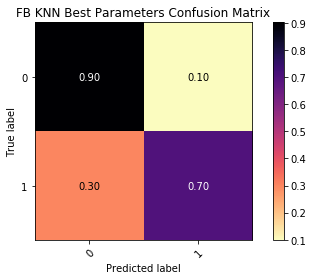

<Figure size 432x288 with 0 Axes>

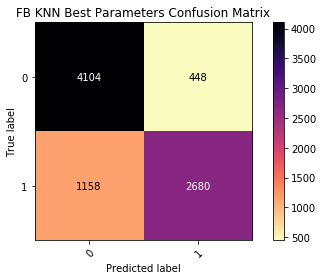

In [51]:
# We want to find which has the best ROC Curve and confusion matrix
# plt.figure(figsize = (8,6))
fb_best_params_selected = {'n_neighbors': 80, 'p': 1, 'weights': 'uniform'}
fb_best_knn= KNeighborsClassifier(n_neighbors=fb_best_params_selected['n_neighbors'],p = fb_best_params_selected['p'], weights = fb_best_params_selected['weights']
                                  ,n_jobs=-1)
fb_best_knn.fit(fb_topn_train_sc, fb_topn_y_train_all)
fb_best_knn_pred = fb_best_knn.predict(fb_topn_test_sc)
classes = unique_labels(fb_topn_y_test_all, fb_best_knn_pred)
plot_confusion_matrix(fb_topn_y_test_all, fb_best_knn_pred,classes = classes,
                      normalize=True,
                      title=f'FB KNN Best Parameters Confusion Matrix',
                      cmap=plt.cm.magma_r)
plt.figure()
plot_confusion_matrix(fb_topn_y_test_all, fb_best_knn_pred,classes = classes,
                      normalize=False,
                      title=f'FB KNN Best Parameters Confusion Matrix',
                      cmap=plt.cm.magma_r)

# Facebook Neural Net Begin

1. what number of nodes should we begin with in hidden layer 1 
 - We first looked at how many nodes in the first hidden layer would be best. 
 - We choose 120 as this gave us one of the best accuracy vs the other selections we had. What intrigues us about 120 nodes in the first hidden layer, it has the highest right tail or the highest upper bound of the CV distribution. 
 - We are only looking at the first hidden layer because in each preceding hidden layer we will be decreasing the nodes in the next layer by 1/2. We are choosing this approach because the professor has stated this is the approach he normally takes and sees good results with it, therefore, let’s test it out and see the results that we get.

In [62]:
layers_to_test = 1
activation = 'sigmoid'
activ_len= len(activation)
starting_node = [20, 60, 120, 240, 500, 1000]
epochs = 300
fb_nn_train_acc = []
fb_nn_test_acc = []
cv = 9
kfold = KFold(n_splits=cv,shuffle=True)

for node_size in starting_node:
    for train, test in kfold.split(telco_X_train, y_train):
        fb_train_acc_, fb_test_acc_ = evaluate_nn(layers_to_test,node_size,fb_topn_train_sc[train], fb_topn_y_train_all[train], fb_topn_train_sc[test],  fb_topn_y_train_all[test],
                                           activation = activation, epochs = epochs,early_stopping=5, batch_size = 1000,verbose=0,class_pred=False)
        fb_nn_train_acc.append(fb_train_acc_)
        fb_nn_test_acc.append(fb_test_acc_)

In [63]:
fb_train_acc_plt = np.reshape(np.array(fb_nn_train_acc),(cv,len(starting_node)))
fb_test_acc_plt = np.reshape(np.array(fb_nn_test_acc),(cv,len(starting_node)))

Text(0.5,0,'# of Nodes in hidden layer')

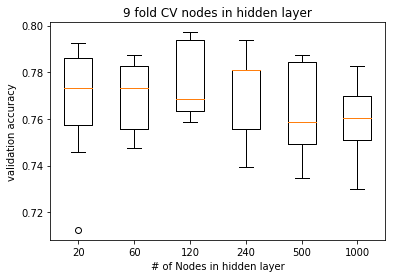

In [65]:
plt.boxplot(fb_test_acc_plt)
plt.get_figlabels()
plt.xticks(range(1,7),starting_node)
plt.title('9 fold CV nodes in hidden layer')
plt.ylabel('validation accuracy')
plt.xlabel('# of Nodes in hidden layer')

# Facebook Neural Nets

## Facebook Neural Net Accuracy & Loss as a function of hidden layers, epochs and activation functions

1. We are testing accuracy across number of hidden layers,  activations and epochs
2. We are starting with 120 nodes and in each preceding hidden layer we are decreasing by 1/2 vs nodes in l-1 where l is layer we are currently in
  - We are choosing this approach because the professor has stated this is the approach he normally takes and sees good results with it, therefor, we will test it

### Findings:
#### Accuracy
1. Looking across all hidden layers and activations they all achieve similar accuracy scores. Softmax with 4 and 5 hidden layers doesn’t perform well at all, as its accuracy is below our minimum window of 70%.
2. Sigmoid function findings 
  - The sigmoid function doesn’t appear to overfit the data in any of the layers. 
  - There is a steady and expected deviation between training and test accuracy. 
  - It achieves its optimal accuracy (elbow in the accuracy curve) around 50 epochs across all layers. Going from layer a hidden layer of 1 to 2 sees a small increase in accuracy (79% to 80.5%) but we don’t see the same increase beyond 2 hidden layers. 
3. TanH function appears to output similar accuracy to sigmoid function across all layers. It doesn’t appear to overfit the data in any of the layers as we see a steady and expected deviation between training and test accuracy. It achieves its optimal accuracy (elbow in the accuracy curve) between 25- 50 epochs across all layers. Going from layer a hidden layer of 1 to 2 sees a small increase in accuracy (79% to 80%) but we don’t see that same increase beyond 2 hidden layers. It appears to be a very stable activation function. 
4. Relu function appears to output similar accuracy to sigmoid function across all layers. 
 - This doesn’t overfit the data as it did with the Telco dataset which shows you these algorithms aren’t one size fits all. 
 - They need to be experimented with. We have a steady and expected deviation between training and test accuracy which indicates that it’s not overfitting the data. It achieves its optimal accuracy (elbow in the accuracy curve) very quickly around 10 epochs. 
 - Going from layer a hidden layer of 1 to 2 we do see a small increase in accuracy(80% to 81%) but we don’t really see a similar type of increase beyond 2 hidden layers. It appears to be a very stable activation function. 
5. Softsign function performs very similar to relu.
  - It achieves its optimal accuracy (elbow in the accuracy curve) very quickly, around 10-40 epochs across all hidden layers. 
  - There is a very minimal increase from hidden lay 12 345. We do have to weigh the time cost of a neural net with this many hidden layers.No signs of overfitting as we see an expected amount of deviation between training and test accuracy.
6. Softmax function appears to be the least optimal choice of activation functions here. 
  - There is a small increase in accuracy from hidden layer 1 to 2 but no increase in accuracy from 2 to 3. 
  - Layers 4 and 5 are not appearing on our zoomed in chart because their accuracies are below our minimum threshold of 70%, therefore, 4 & 5 hidden layers on this activation function is not optimal. It achieves its optimal accuracy (elbow in the accuracy curve) slower than the other functions, around 75-100 epochs across the first 3 hidden layers. Compared to the other activation functions we have; this does not appear to be optimal.  

 
 
### Conclusion
 - As we want to choose a model which is simple but still achieves the best results we will choose a 2 hiddent layer, 120 epoch neural net. We will test it across multiple activation functions to see which is optimal

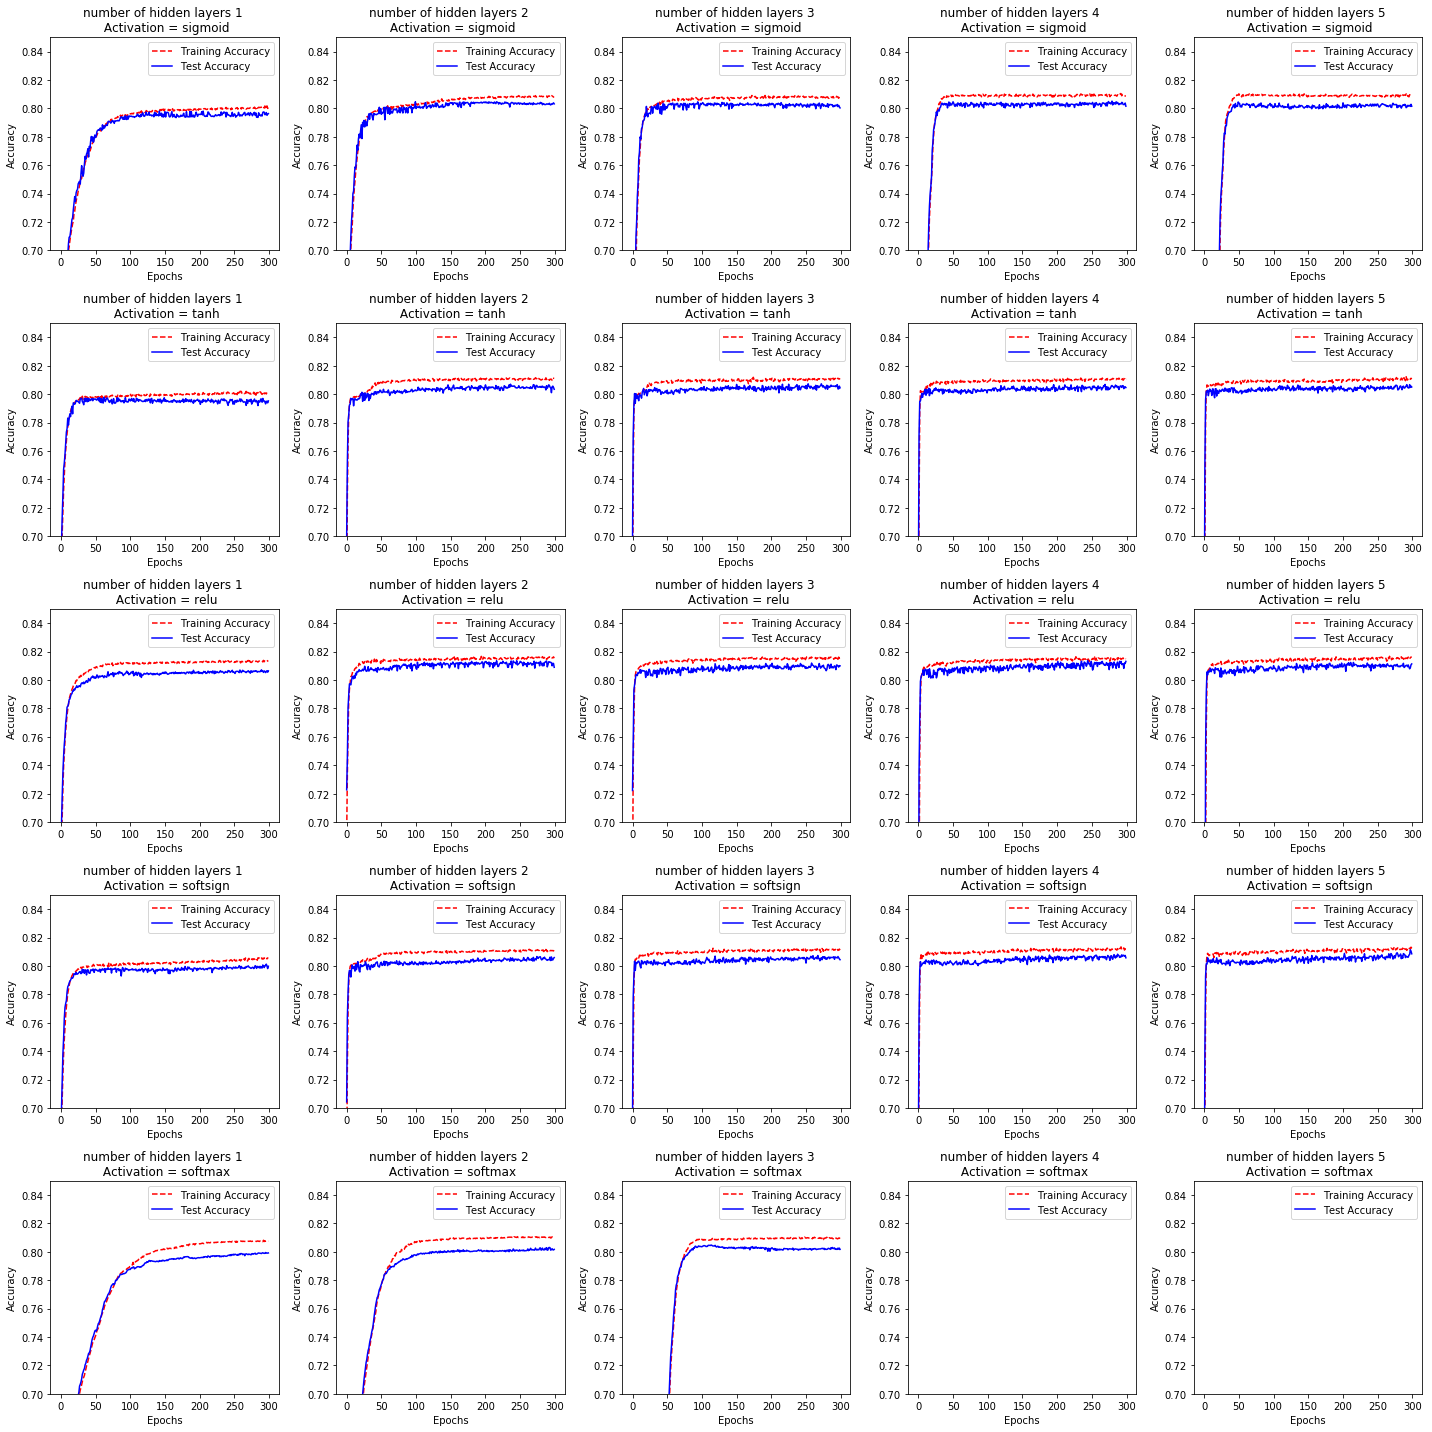

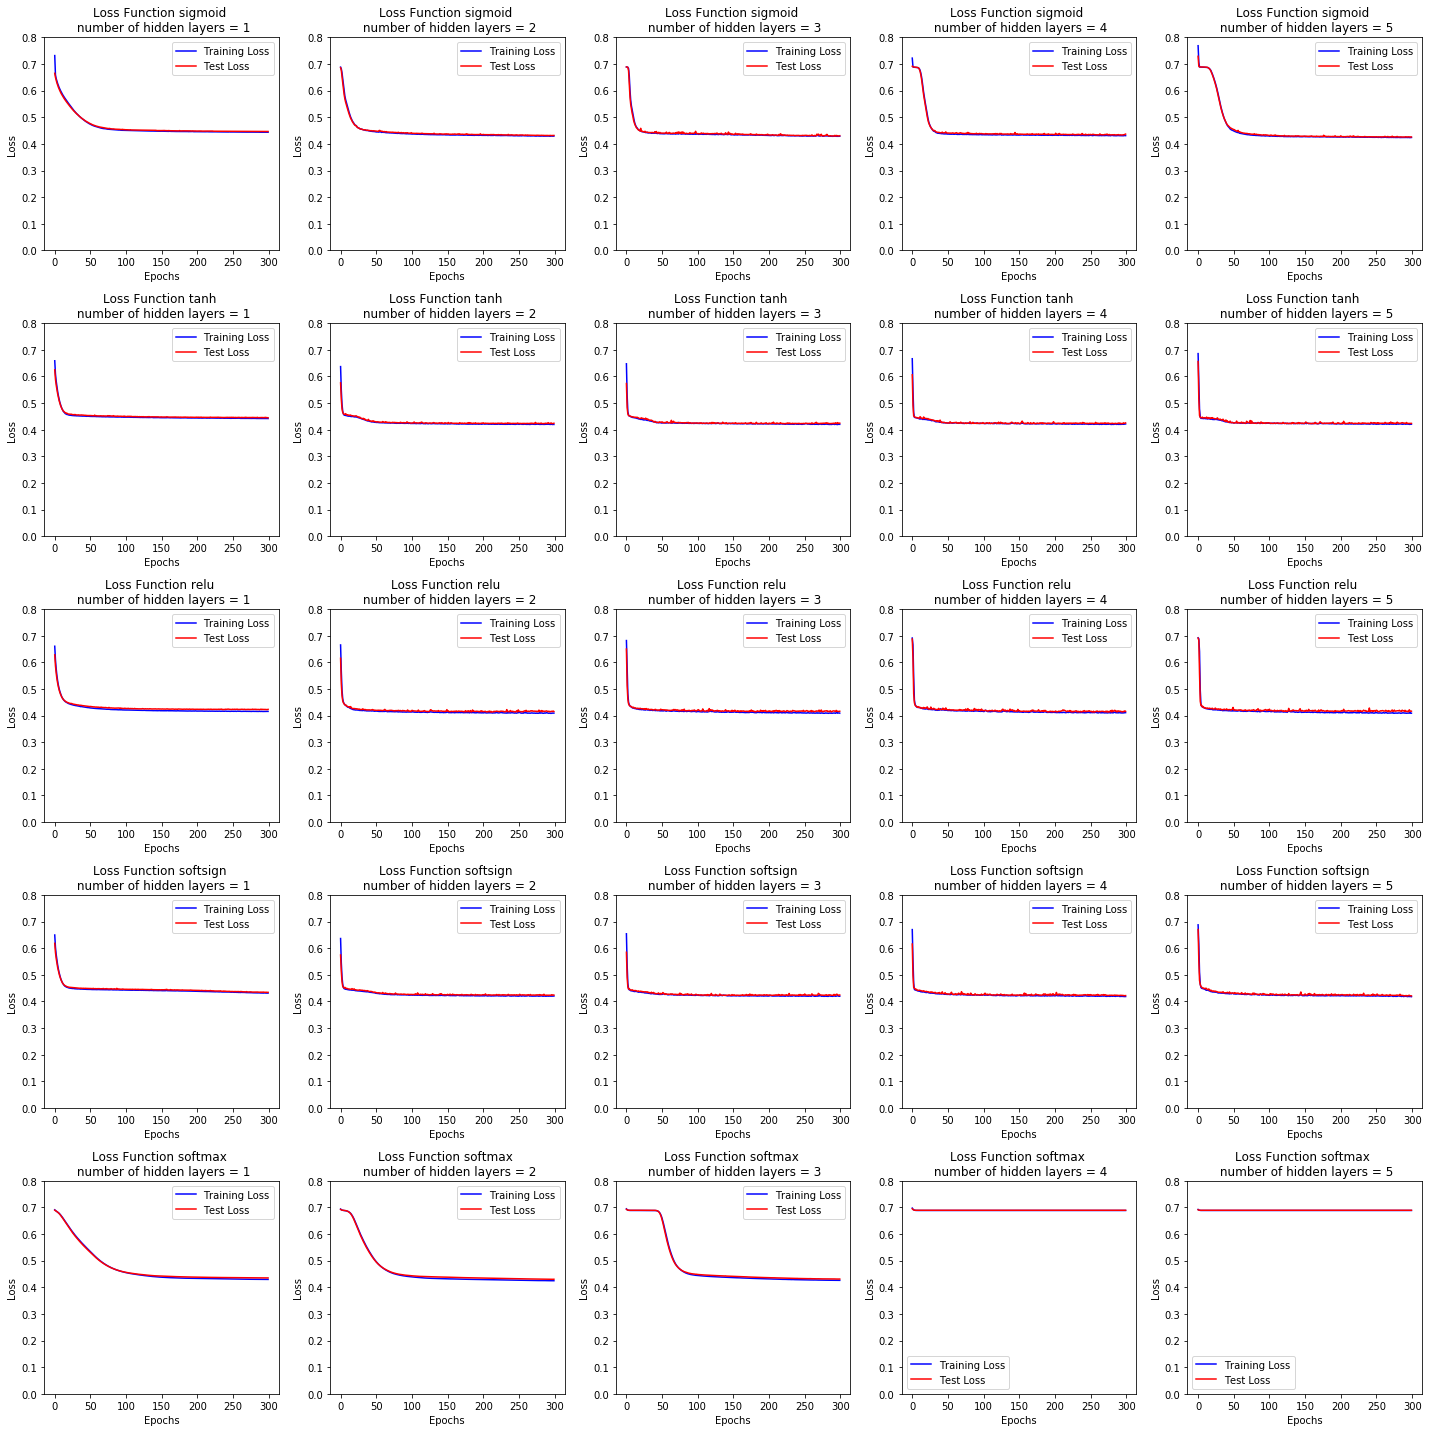

In [77]:
layers_to_test = [1,2,3,4,5]
activation = ['sigmoid', 'tanh', 'relu', 'softsign', 'softmax']
activ_len= len(activation)
starting_node = 120
epochs = 300

# accuracy plot
fig, axs = plt.subplots(nrows=activ_len,ncols=len(layers_to_test), figsize=(20, 20), facecolor='w', edgecolor='k')
axs = axs.ravel()

# loss plot
figs, axes = plt.subplots(nrows=activ_len,ncols=len(layers_to_test), figsize=(20, 20), facecolor='w', edgecolor='k')
axes = axes.ravel()
start = time()
for row,activ in enumerate(activation):
    row = row*len(layers_to_test)
    for i in layers_to_test:
        history = layers_exp(i,starting_node,fb_topn_x_train_lim,fb_topn_y_train_lim, fb_topn_x_val, fb_topn_y_val, activation = activ, epochs = epochs, batch_size = 1000,verbose=0, class_pred=False)

        # Get training and test accuracy histories
        training_accuracy = history.history['acc']
        test_accuracy = history.history['val_acc']
        loss = history.history['loss']
        val_loss = history.history['val_loss']

        # Create count of the number of epochs
        layer_count = range(1, len(layers_to_test)+1)
        subplot_numb = i-1 + row
        second_row = subplot_numb + len(layers_to_test)

        # Visualize accuracy history
        axs[subplot_numb].plot(training_accuracy, 'r--')
        axs[subplot_numb].plot(test_accuracy, 'b-')
        axs[subplot_numb].legend(['Training Accuracy', 'Test Accuracy'])
        axs[subplot_numb].set_title(f'number of hidden layers {i} \n Activation = {activ}')
        axs[subplot_numb].set_xlabel('Epochs')
        axs[subplot_numb].set_ylabel('Accuracy')
        axs[subplot_numb].set_ylim(0.7,.85)

        axes[subplot_numb].plot(loss, 'b-')
        axes[subplot_numb].plot(val_loss, 'r-')
        axes[subplot_numb].legend(['Training Loss', 'Test Loss'])
        axes[subplot_numb].set_title(f'Loss Function {activ} \n number of hidden layers = {i}')
        axes[subplot_numb].set_xlabel('Epochs')
        axes[subplot_numb].set_ylabel('Loss')
        axes[subplot_numb].set_ylim(0,.8)
end = time()
fig.tight_layout()
figs.tight_layout()

In [79]:
(end-start)/60

21.874601471424103

# Facebook Neural Net Performance -ROC Curve

### Conclusion
 
1. When we look at the ROC curve and the AUC score we see that given 2 hidden layers all of our activation functions give us very similar AUC scores. 
  - This means they are all virtually the same.  
  - The AUC score ranges from .8821 - .8887. 
  - The Relu gives us the highest AUC score at .8887. 
  - Given that Relu has the highest AUC score, tightest 9 fold CV scores and highest mean from 9 fold CV, we will choose this as our optimal model and proceed with looking at the confusion matrix . 

sigmoid had an auc score of 0.8831
The sigmoid % correct is 0.808
tanh had an auc score of 0.8841
The tanh % correct is 0.8132
relu had an auc score of 0.8887
The relu % correct is 0.8179
softsign had an auc score of 0.8843
The softsign % correct is 0.8137
softmax had an auc score of 0.8821
The softmax % correct is 0.8095


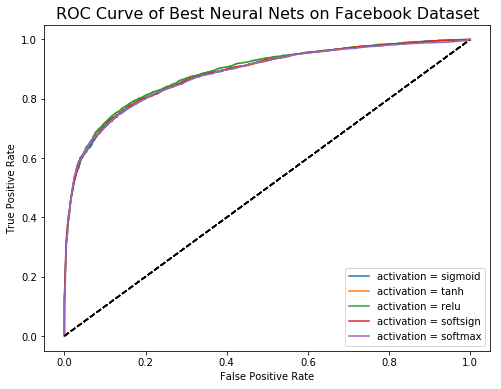

In [80]:
# We want to find which has the best ROC Curve and confusion matrix
activation = ['sigmoid', 'tanh', 'relu', 'softsign', 'softmax']
layers = 2
starting_node = 120
epoch = 150

plt.figure(figsize = (8,6))
for activ in activation:
    _,  fb_pred, fb_pred_prob = layers_exp(layers,starting_node,fb_topn_train_sc, fb_topn_y_train_all, fb_topn_test_sc, fb_topn_y_test_all,
                                     activation = activ, epochs = epoch, batch_size = 1000,verbose=0,class_pred=True)
    fpr, tpr, _ = roc_curve(fb_topn_y_test_all, fb_pred_prob)
    auc_score = roc_auc_score(fb_topn_y_test_all, fb_pred_prob)
    print(f'{activ} had an auc score of {np.round(auc_score, decimals = 4)}')
    confusion_mat = confusion_matrix(fb_topn_y_test_all,fb_pred)
    print(f'The {activ} % correct is {np.round(np.diag(confusion_mat).sum()/confusion_mat.sum(),decimals = 4)}')
    plt.title('ROC Curve of Best Neural Nets on Facebook Dataset', fontsize = 16)
    plt.plot([0,1],[0,1], 'k--')
    plt.plot(fpr, tpr, label = f'activation = {activ}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

In [83]:
layers_to_test = 2
activation = ['sigmoid', 'tanh', 'relu', 'softsign', 'softmax']
activ_len= len(activation)
starting_node = 120
epochs = 150
fb_nn_activ_train_acc = []
fb_nn_activ_test_acc = []
cv = 9
fb_kfold = KFold(n_splits=cv,shuffle=True)

for activ in activation:
    for train, test in fb_kfold.split(fb_topn_train_sc, fb_topn_y_train_all):
        fb_train_acc_, fb_test_acc_ = evaluate_nn(layers_to_test,starting_node,fb_topn_train_sc[train], fb_topn_y_train_all[train], fb_topn_train_sc[test],  fb_topn_y_train_all[test],
                                           activation = activ, epochs = epochs,early_stopping=5, batch_size = 1000,verbose=0,class_pred=False)
        fb_nn_activ_train_acc.append(fb_train_acc_)
        fb_nn_activ_test_acc.append(fb_test_acc_)

In [85]:
fb_train_activ_acc_plt = np.reshape(np.array(fb_nn_activ_train_acc),(cv,len(activation)))
fb_test_activ_acc_plt = np.reshape(np.array(fb_nn_activ_test_acc),(cv,len(activation)))

# Facebook Neural Net Performance - 9 fold CV Model Performance
1. Looking at all the neural net activation functions we see in increase in accuracy from 1 hidden layer to 2. 
  - After that, there’s little if any benefit of adding an additional layer across all activation functions. 
  - Our goal here, given 2 hidden layers which activation function gives us the best 9 fold cross validation score. 
  - Optimal is defined as having the highest accuracy with some respect to computation time. 
  - Both TanH and Relu give us similar cross validation test accuracy. 
  - Relu has a much tighter distribution meaning that it is more consistent. Another way of saying this because the distribution of our cross validation scores are so tight our model has low bias/low variances. 

Text(0.5,0,'Activation Function')

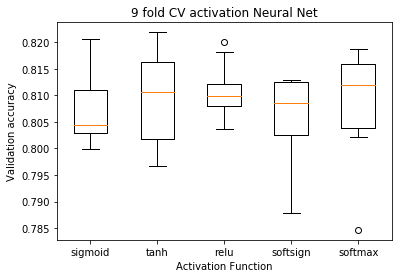

In [86]:
plt.boxplot(fb_test_activ_acc_plt)
plt.get_figlabels()
plt.xticks(range(1,6),activation)
plt.title('9 fold CV activation Neural Net')
plt.ylabel('Validation accuracy')
plt.xlabel('Activation Function')

# Facebook Neural Net Performance - Confusion Matrix

#### Conclusion
1. Looking at confusion matrix reveals similar findings to our KNN. 
 - We found that we identified 81% of all classes correct. 
 - We had a 29/71 split on our labels we predicted as 1. 
 - Overall we would call this model optimal

Normalized confusion matrix
[[0.90641476 0.09358524]
 [0.28764982 0.71235018]]


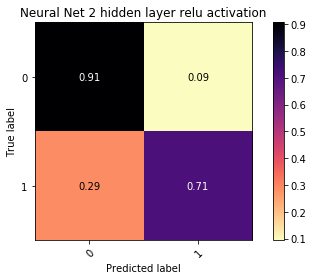

In [88]:
# We want to find which has the best ROC Curve and confusion matrix
activation = ['relu']
layers = 2
starting_node = 120
epoch = 150

# plt.figure(figsize = (8,6))
for activ in activation:
    _,  fb_pred, fb_pred_prob = layers_exp(layers,starting_node,fb_topn_train_sc, fb_topn_y_train_all, fb_topn_test_sc, fb_topn_y_test_all,
                                     activation = activ, epochs = epoch, batch_size = 1000,verbose=0,class_pred=True)
    classes = unique_labels(fb_topn_y_test_all, fb_pred)
    plot_confusion_matrix(fb_topn_y_test_all, fb_pred,classes = classes,
                          normalize=True,
                          title=f'Neural Net 2 hidden layer {activ} activation',
                          cmap=plt.cm.magma_r)

# Facebook Neural Net Learning Curve
 - Overall we have a good model.
 - It has low bias/low variance
 - training and test accuracy converges
 - We conclude that it does given how the training and testing accuracy see little deviation between them

In [337]:
train_score, test_score, size = learn_curve_nn(n_layers=2,starting_nodes=120,epochs=150,X=fb_topn_train_sc,y=fb_topn_y_train_all,train_sizes=[.2,.4,.6,.8])

C:\Users\JOSH\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


<module 'matplotlib.pyplot' from 'C:\\Users\\JOSH\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

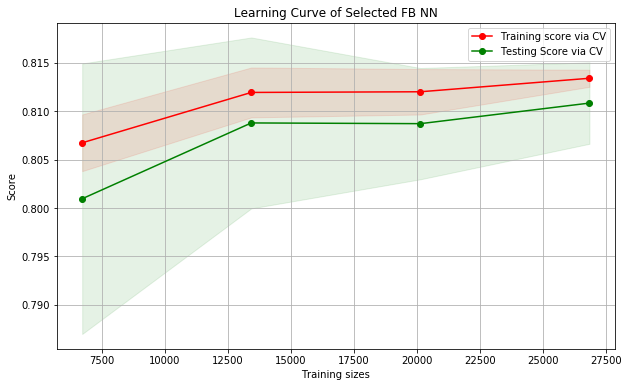

In [339]:
plot_learning_curves_nimb(size, np.array(train_score), np.array(test_score),title='Learning Curve of Selected FB NN',xlabel='Training sizes')

# Facebook Model Standoff
- Only one model to rule them all which will survive
- Spoiler alert it's neural net

### Finding
1. Now we compare all the models we’ve ran on this dataset across homework 2 and 3. 
 - We see that the Neural nets 25th percentile of testing accuracy is above every other algorithm 75th percentile. 
 - This tells us that this model has the best performance vs the algorithms we’ve tested so far. 
 - It goes to show us that there is not one best algorithm, we must test different algorithms over the same dataset to see which will perform optimal. There’s no free lunch! 

In [91]:
cv = 9
fb_all_model_results = []

#Best Linear Model
svmfb_lin_fb = svm.SVC(C = 1, kernel = 'linear',probability = True)
svmfb_lin_fb.fit(x_train_pca_fb,fb_train_all_y)
fb_all_model_results.append(cross_val_score(svmfb_lin_fb, x_test_pca_fb, fb_test_all_y, cv=cv,n_jobs=-1, scoring='accuracy'))

#Best RBF Model
svmclf_rbf_fb = svm.SVC(C = 3.25, kernel = 'rbf', gamma = .0231,probability = True)
svmclf_rbf_fb.fit(x_train_pca_fb,fb_train_all_y)
fb_all_model_results.append(cross_val_score(svmclf_rbf_fb, x_test_pca_fb, fb_test_all_y, cv=cv,n_jobs=-1, scoring='accuracy'))

#Best Poly Model
svmclf_ply_fb = svm.SVC(C = 10, kernel = 'poly',degree=3, gamma = .011889,probability = True)
svmclf_ply_fb.fit(x_train_pca_fb,fb_train_all_y)
fb_all_model_results.append(cross_val_score(svmclf_ply_fb, x_test_pca_fb, fb_test_all_y, cv=cv,n_jobs=-1, scoring='accuracy'))

#best Decision tree
clf_dt_p_fb = tree.DecisionTreeClassifier(max_depth=6)
clf_dt_p_fb.fit(x_train_pca_fb,fb_train_all_y)
fb_all_model_results.append(cross_val_score(clf_dt_p_fb,  x_test_pca_fb, fb_test_all_y,cv=cv,n_jobs = -1, scoring='accuracy'))

#best Boosted Tree
adaclf_fb = AdaBoostClassifier(n_estimators=100)
adaclf_fb.fit(x_train_pca_fb, fb_train_all_y)
fb_all_model_results.append(cross_val_score(adaclf_fb,  x_test_pca_fb, fb_test_all_y,cv=cv,n_jobs = -1,  scoring='accuracy'))

# Best KNN Classifier
fb_best_params_selected = {'n_neighbors': 80, 'p': 1, 'weights': 'uniform'}
fb_best_knn= KNeighborsClassifier(n_neighbors=fb_best_params_selected['n_neighbors'],p = fb_best_params_selected['p'], weights = fb_best_params_selected['weights']
                                  ,n_jobs=-1)
fb_best_knn.fit(fb_topn_train_sc, fb_topn_y_train_all)
fb_all_model_results.append(cross_val_score(fb_best_knn, fb_topn_test_sc,fb_topn_y_test_all, cv=cv,n_jobs = -1,  scoring='accuracy'))

# Best Neural Net
layers = 2
starting_node = 120
epoch = 150
fb_nn_cv = []
kfold = KFold(n_splits=cv,shuffle=True)
for train, test in kfold.split(X_fb_top, y_fb_top):
    
    # since we scaled before we need to do it again to stay consistent
    fb_mod_comp_scale = StandardScaler().fit(X_fb_top[train])
    fb_topn_train_sc_mc = fb_mod_comp_scale.transform(X_fb_top[train])
    fb_topn_test_sc_mc = fb_mod_comp_scale.transform(X_fb_top[test])
    
    # evaluate the models
    fb_train_acc_final, fb_test_acc_final = evaluate_nn(layers,starting_node,fb_topn_train_sc_mc, y_fb_top[train], fb_topn_test_sc_mc,  y_fb_top[test], 
                                       activation = 'relu', epochs = epoch,early_stopping=5, batch_size = 1000,verbose=0,class_pred=False)
    fb_nn_cv.append(fb_test_acc_final)
fb_all_model_results.append(np.array(fb_nn_cv))

C:\Users\JOSH\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\JOSH\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\JOSH\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\JOSH\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\JOSH\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to f

# Final Facebook Data Standoff

#### In the end we would choose the Neural Net Model as the best

1. Reasons for picking this model
 - Neural net has accuracy which was higher than all the others and a much tighter distribution
 - it also has low bias/low variance which was shown earlier in our learning curve


Text(0,0.5,'Accuracy')

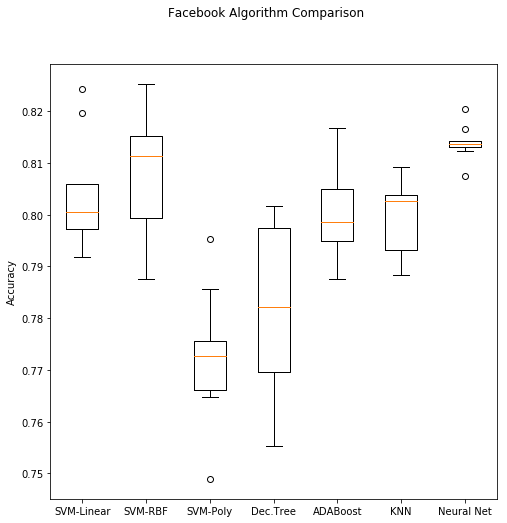

In [94]:
#Plot the best results
my_names = ['SVM-Linear', 'SVM-RBF','SVM-Poly', 'Dec.Tree','ADABoost', 'KNN','Neural Net']
fig = plt.figure(figsize=(8,8))
fig.suptitle('Facebook Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(fb_all_model_results)
ax.set_xticklabels(my_names)
ax.set_ylabel('Accuracy')